# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-9.1.-Spam-email" data-toc-modified-id="Exercise-9.1.-Spam-email-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 9.1. Spam email</a></div><div class="lev1 toc-item"><a href="#Exercise-9.2.-MNIST-classification:-pixels-vs-edge-based-features" data-toc-modified-id="Exercise-9.2.-MNIST-classification:-pixels-vs-edge-based-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 9.2. MNIST classification: pixels vs edge-based features</a></div><div class="lev1 toc-item"><a href="#Exercise-9.3.-Student-debt" data-toc-modified-id="Exercise-9.3.-Student-debt-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 9.3. Student debt</a></div><div class="lev1 toc-item"><a href="#Exercise-9.4.-Least-Squares-and-perfectly-circular-contours:-part-1" data-toc-modified-id="Exercise-9.4.-Least-Squares-and-perfectly-circular-contours:-part-1-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 9.4. Least Squares and perfectly circular contours: part 1</a></div><div class="lev1 toc-item"><a href="#Exercise-9.5.-Breast-cancer-dataset" data-toc-modified-id="Exercise-9.5.-Breast-cancer-dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 9.5. Breast cancer dataset</a></div><div class="lev1 toc-item"><a href="#Exercise-9.6.-PCA-sphering-and-the-Least-Squares-cost-for-linear-regression" data-toc-modified-id="Exercise-9.6.-PCA-sphering-and-the-Least-Squares-cost-for-linear-regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 9.6. PCA-sphering and the Least Squares cost for linear regression</a></div><div class="lev1 toc-item"><a href="#Exercise-9.7.-Comparing-standard-normalization-to-PCA-sphering-on-MNIST" data-toc-modified-id="Exercise-9.7.-Comparing-standard-normalization-to-PCA-sphering-on-MNIST-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 9.7. Comparing standard normalization to PCA sphering on MNIST</a></div><div class="lev1 toc-item"><a href="#Exercise-9.8.-Least-Squares-and-perfectly-circular-contours:-part-2" data-toc-modified-id="Exercise-9.8.-Least-Squares-and-perfectly-circular-contours:-part-2-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 9.8. Least Squares and perfectly circular contours: part 2</a></div><div class="lev1 toc-item"><a href="#Exercise-9.9.-Exploring-predictors-of-housing-prices" data-toc-modified-id="Exercise-9.9.-Exploring-predictors-of-housing-prices-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 9.9. Exploring predictors of housing prices</a></div><div class="lev1 toc-item"><a href="#Exericise-9.10.-Predicting-Miles-per-Gallon-in-automobiles" data-toc-modified-id="Exericise-9.10.-Predicting-Miles-per-Gallon-in-automobiles-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exericise 9.10. Predicting Miles-per-Gallon in automobiles</a></div><div class="lev1 toc-item"><a href="#Exercise-9.11.--Studying-important-predictors-of-credit-risk" data-toc-modified-id="Exercise-9.11.--Studying-important-predictors-of-credit-risk-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Exercise 9.11.  Studying important predictors of credit risk</a></div><div class="lev1 toc-item"><a href="#Exercise-9.12.--Exploring-predictors-of-housing-prices" data-toc-modified-id="Exercise-9.12.--Exploring-predictors-of-housing-prices-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Exercise 9.12.  Exploring predictors of housing prices</a></div><div class="lev1 toc-item"><a href="#Exercise-9.13.-Studying-important-predictors-of-credit-risk" data-toc-modified-id="Exercise-9.13.-Studying-important-predictors-of-credit-risk-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Exercise 9.13. Studying important predictors of credit risk</a></div>

In [1]:
# load in basic libraries and autograd wrapped numpy
from autograd import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
datapath = '../mlrefined_datasets/superlearn_datasets/'
import sys
sys.path.append('../')

# imports from custom library
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib

# import demos for this notebook
optimizers = optlib.optimizers
regress_plotter = superlearn.lin_regression_demos
static_plotter = superlearn.classification_static_plotter.Visualizer()
cost_functions = superlearn.cost_functions

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 9.1. Spam email

This dataset can be downloaded via the link below 


```https://archive.ics.uci.edu/ml/datasets/Spambase```

In [2]:
# load data
data = np.loadtxt(datapath + 'spambase_data.csv',delimiter = ',')
x_orig = data[:-1,:]
y = data[-1:,:] 

Standard normalize input.

In [3]:
# standard normalization function - with nan checker / filler in-er
def standard_normalizer(x):    
    # compute the mean and standard deviation of the input
    x_means = np.nanmean(x,axis = 1)[:,np.newaxis]
    x_stds = np.nanstd(x,axis = 1)[:,np.newaxis]   

    # check to make sure thta x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind]
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust
        
    # fill in any nan values with means 
    ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = x_means[i[0]]

    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds

    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means

    # return normalizer 
    return normalizer,inverse_normalizer

In [4]:
# return normalization functions based on input x
normalizer,inverse_normalizer = standard_normalizer(x_orig)

# normalize input by subtracting off mean and dividing by standard deviation
x_orig = normalizer(x_orig)

Define softmax cost.

In [5]:
# compute linear combination of input points
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# an implementation of the softmax cost
def softmax(w):    
    # compute the least squares cost
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/y.shape[1]

Define a `counting_cost` function to count number of misclassification.

In [35]:
### cost functions ###
def counting_cost(w,x,y):
    # compute predicted labels
    y_hat = np.sign(model(x,w))

    # compare to true labels
    ind = np.argwhere(y != y_hat)
    ind = [v[1] for v in ind]

    cost = np.sum(len(ind))
    return cost

Now make runs of gradient descent.

In [7]:
alpha = 10**(1); max_its = 500; 

# optimize
g = softmax; x = x_orig[0:48,:]; w = 0.1*np.random.randn(x.shape[0]+1,1)
weight_history_1,cost_history_1 = optimizers.gradient_descent(g,alpha,max_its,w)
count_history_1 = [counting_cost(v,x,y) for v in weight_history_1]

g = softmax; x = x_orig[0:54,:]; w = 0.1*np.random.randn(x.shape[0]+1,1)
weight_history_2,cost_history_2 = optimizers.gradient_descent(g,alpha,max_its,w)
count_history_2 = [counting_cost(v,x,y) for v in weight_history_2]

g = softmax; x =  x_orig[0:-1,:]; w = 0.1*np.random.randn(x.shape[0]+1,1)
weight_history_3,cost_history_3 = optimizers.gradient_descent(g,alpha,max_its,w)
count_history_3 = [counting_cost(v,x,y) for v in weight_history_3]

With everything setup its time to run all.

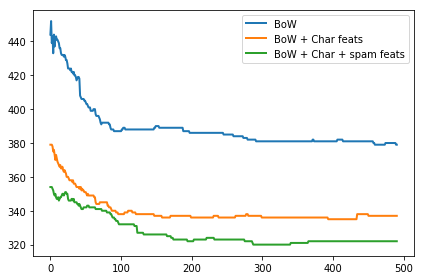

In [8]:
# plot histories
plt.plot(count_history_1[10:],linewidth = 2)
plt.plot(count_history_2[10:],linewidth = 2)
plt.plot(count_history_3[10:],linewidth = 2)

plt.legend(['BoW','BoW + Char feats','BoW + Char + spam feats'])
plt.show()

# Exercise 9.2. MNIST classification: pixels vs edge-based features

Load in data.

In [51]:
from sklearn.datasets import fetch_openml
# import MNIST
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# re-shape input/output data
x = x.T
y = np.array([int(v) for v in y])[np.newaxis,:]

print("input shape = " , x.shape)
print("output shape = ", y.shape)

input shape =  (70000, 784)
output shape =  (70000,)


Randomly sample input / output pairs.

In [61]:
# sample indices
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]

Contrast normalize images.  To do this we will use our `standard_normalizer` function.

In [62]:
# standard normalization function - with nan checker / filler in-er
def standard_normalizer(x):    
    # compute the mean and standard deviation of the input
    x_means = np.nanmean(x,axis = 1)[:,np.newaxis]
    x_stds = np.nanstd(x,axis = 1)[:,np.newaxis]   

    # check to make sure thta x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind]
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust
        
    # fill in any nan values with means 
    ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = x_means[i[0]]

    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds

    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means

    # return normalizer 
    return normalizer,inverse_normalizer

In [63]:
normalizer,inverse_normalizer = standard_normalizer(x_sample.T)
x_sample = normalizer(x_sample.T).T

Extract edge-based features.

In [64]:
# extract edge-based features
import data_transformer
x_sample_edgebased_features = data_transformer.edge_transformer(x_sample)   

print('shape of original input ', x_sample.shape)
print('shape of transformed input ', x_sample_edgebased_features.shape)

shape of original input  (784, 50000)
shape of transformed input  (1352, 50000)


Next we need to define our multiclass perceptron function, and a counting cost to count misclassifications. 

Since we have done this in previous exercises, we load in a version of it from a backend file below instead of re-defining it in a notebook cell.

For the same reason we import a mini-batch gradient descent optimizer from a backend file as well.

In [65]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass perceptron
def multiclass_perceptron(w,x,y,iter):
    # get subset of points
    x_p = x[:,iter]
    y_p = y[:,iter]

    # pre-compute predictions on all points
    all_evals = model(x_p,w)

    # compute maximum across data points
    a =  np.max(all_evals,axis = 0)        

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_p.astype(int).flatten(),np.arange(np.size(y_p))]
    cost = np.sum(a - b)

    # return average
    return cost/float(np.size(y_p))

In [66]:
# import cost_functions
cost = cost_functions.multiclass_perceptron
counter = cost_functions.counting_cost

import optimizers
optimizer = optimizers.gradient_descent

In [67]:
# setup gradient descent parameters
N = x_sample.shape[0]
C = len(np.unique(y_sample))
g = multiclass_perceptron; 
counter = counting_cost
w = 0.1*np.random.randn(N+1,C);
max_its = 20;
alpha = 10**(-2);
batch_size = 200

# run gradient descent to minimize cost
weight_history_1,cost_history_1 = optimizer(g,w,x_sample,y_sample,alpha,max_its,batch_size,verbose=False)

# run gradient descent to minimize cost
N = x_sample_edgebased_features.shape[0]
w = 0.1*np.random.randn(N+1,C);
weight_history_2,cost_history_2 = optimizer(g,w,x_sample_edgebased_features,y_sample,alpha,max_its,batch_size,verbose=False)

Now we run our history of weights through a counter to count misclassifications.

In [68]:
# multiclass misclassification cost function - aka the fusion rule
def multiclass_counting_cost(w,x,y):                
    # pre-compute predictions on all points
    all_evals = model(x,w)

    # compute predictions of each input point
    y_predict = (np.argmax(all_evals,axis = 0))[np.newaxis,:]
    
    # compute total sum of mislcassifications 
    count = np.sum(np.argwhere(y != y_predict))

    # return number of misclassifications
    return count

# count histories
count_history_1 = [multiclass_counting_cost(v,x_sample,y_sample) for v in weight_history_1]
count_history_2 = [multiclass_counting_cost(v,x_sample_edgebased_features,y_sample) for v in weight_history_2]

Now we plot our cost function values and number of misclassifications per epoch.

<IPython.core.display.Javascript object>


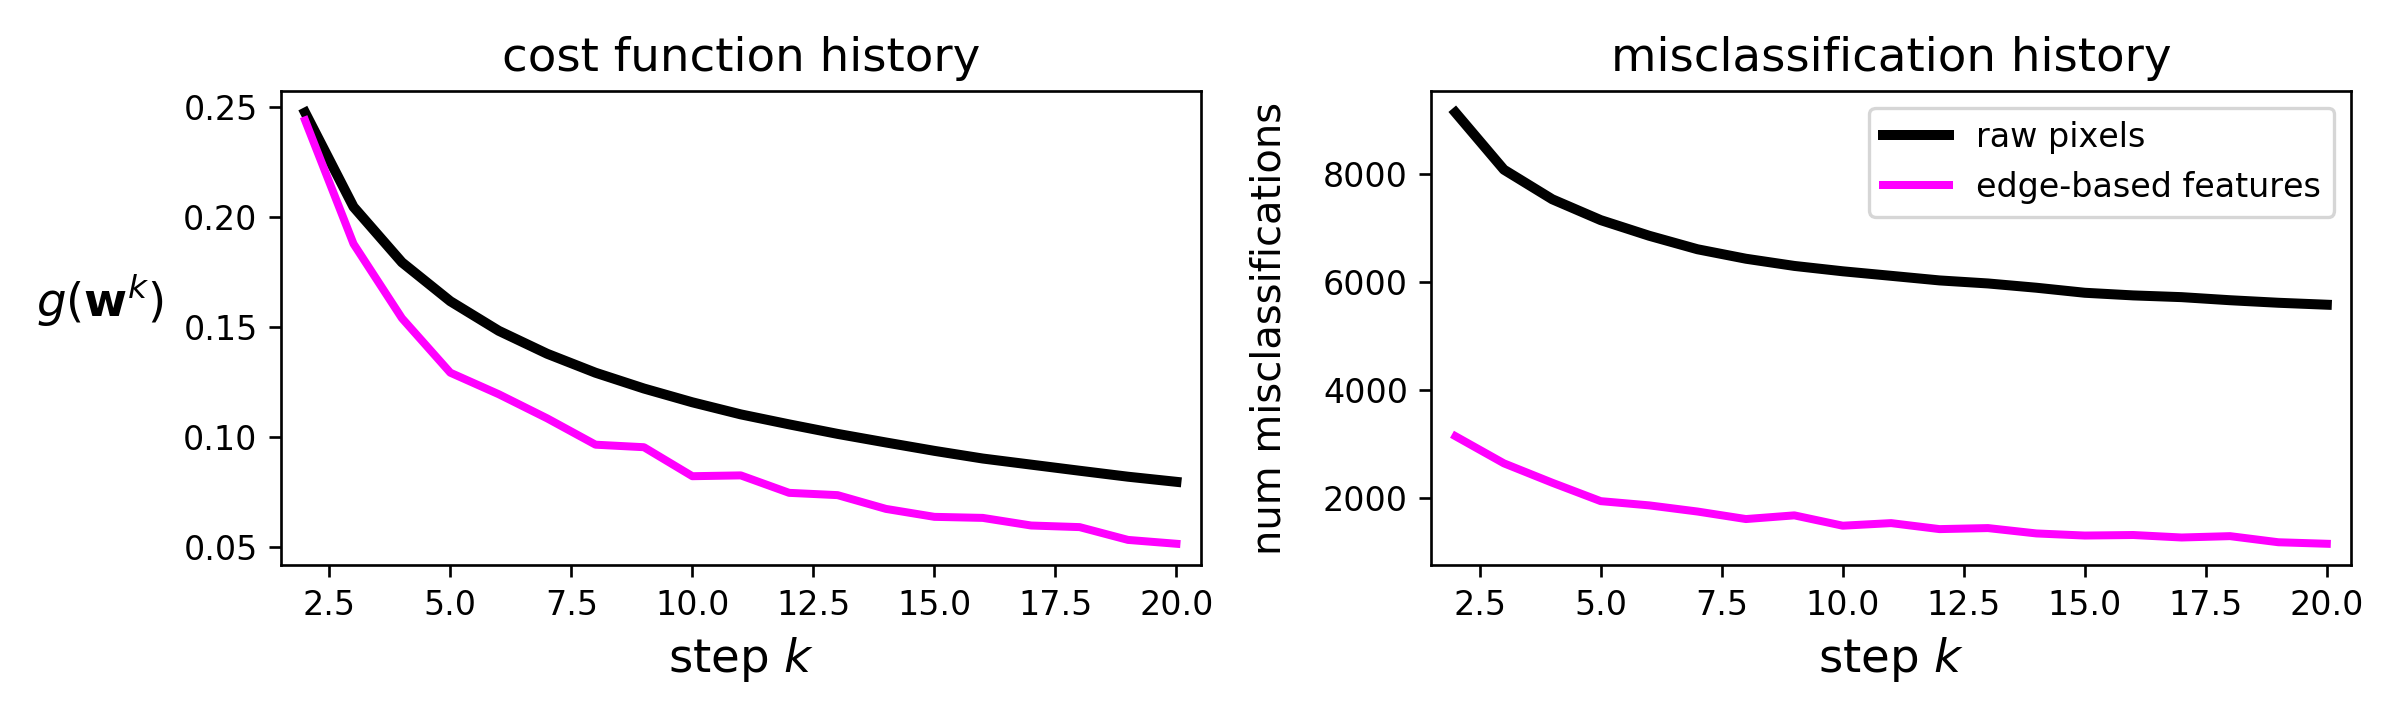

In [69]:
# plot history
classif_plotter = superlearn.classification_static_plotter.Visualizer()

cost_histories = [cost_history_1,cost_history_2]
count_histories = [count_history_1,count_history_2]
labels = ['raw pixels','edge-based features']
classif_plotter.plot_cost_histories(cost_histories,count_histories,start = 2,points = False,labels = labels)

# Exercise 9.3. Student debt

In the example we compare the performance of gradient descent in tuning the Least Squares cost function on the United States student debt dataset -  loaded in and plotted below - when using the raw dataset versus when the input is normalized.  Here the input is in increments of time, and the output is the corresponding total amount of student debt held in the United States.

<IPython.core.display.Javascript object>


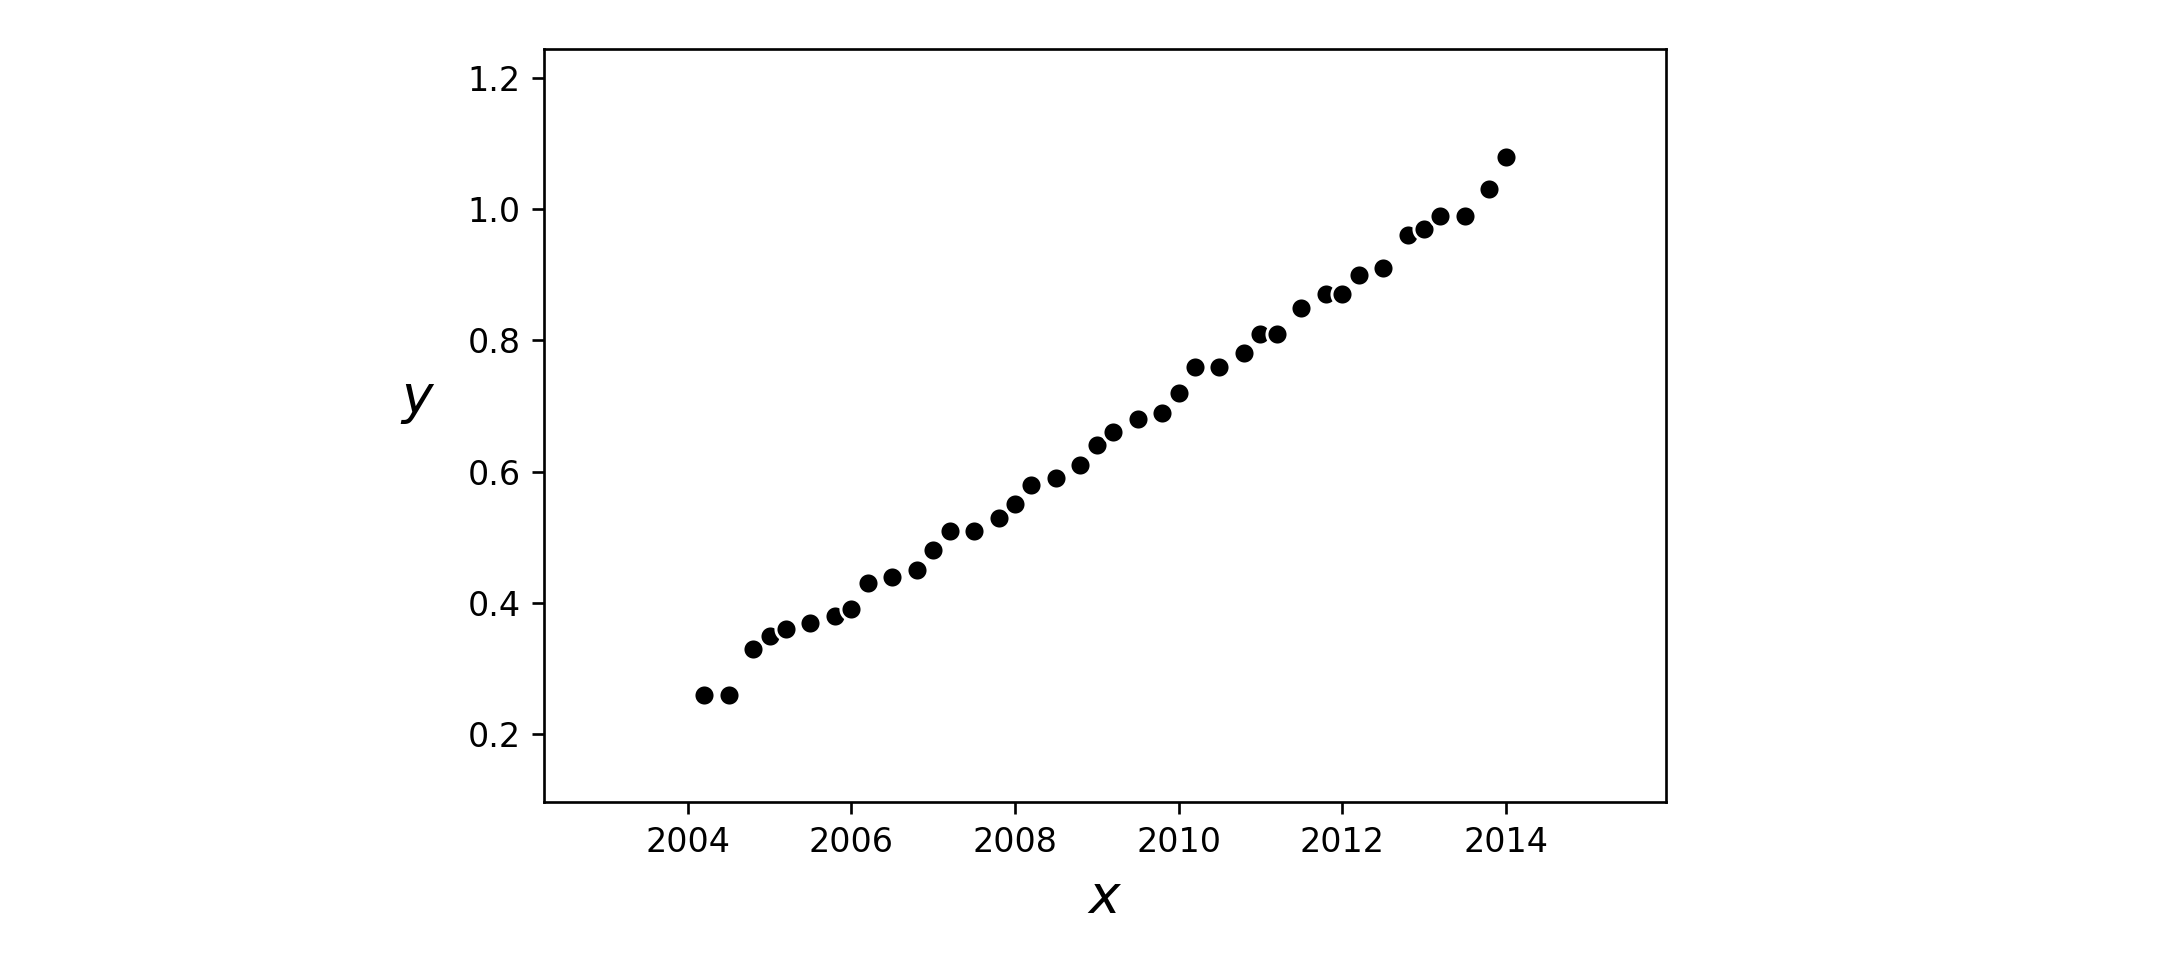

In [70]:
# load data
data = np.loadtxt(datapath + 'student_debt.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# plot dataset
demo = regress_plotter.Visualizer(data)
demo.plot_data()

Below we run gradient descent for $25$ iterations using the steplength parameter $\alpha = 10^{-7}$ - the largest steplength value $\alpha$ of the form $10^{-\gamma}$ (where $\gamma$ is a positive integer) that produced convergence.  We also used the initial point $\mathbf{w}^0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.  After running the algorithm we plot the contours of the Least Squares cost function with the steps from our gradient descent run plotted on top.

Here we can see that the contours of the cost function are enormously elliptical - so much so that the cost function no longer looks like a quadratic (even though it still is - as is every Least Squares cost function).  Because of this there is essentially no practical way to tune the Least Squares cost function on this dataset using gradient descent - unless of course we normalize the input.

<IPython.core.display.Javascript object>


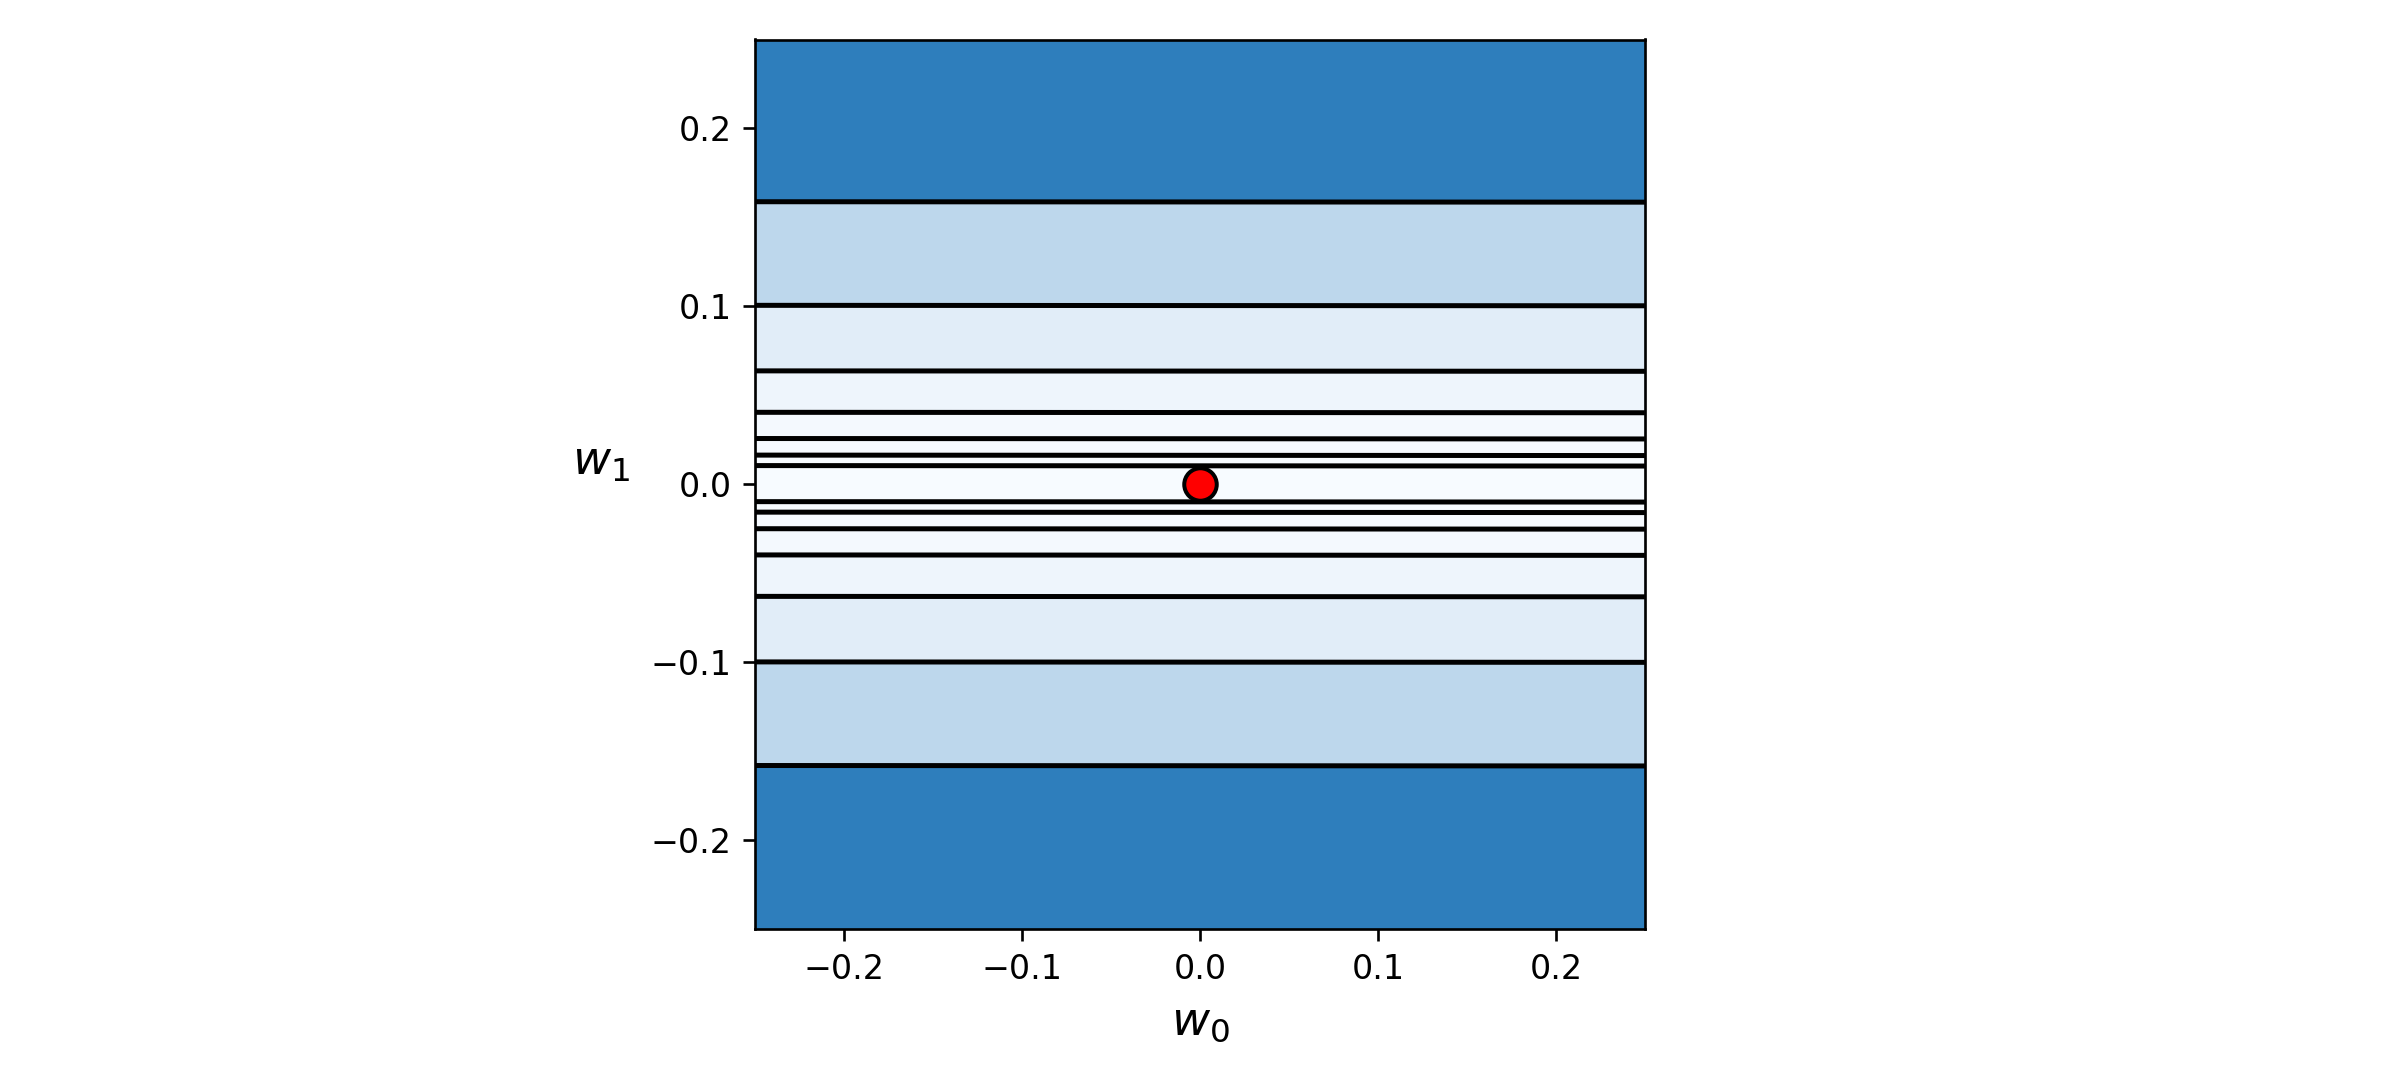

In [71]:
# an implementation of the least squares cost function for linear regression, precisely
# what was shown in Section 8.1 but here pulled in from a backend file
optimizers = optlib.optimizers
least_squares = cost_lib.choose_cost(x,y,'least_squares')

# run gradient descent to minimize the Least Squares cost for linear regression
g = least_squares; w = np.array([0.0,0.0])[:,np.newaxis]; max_its = 25; alpha_choice = 10**(-7);
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,w)

# show run on contour plot
static_plotter = optlib.static_plotter_old.Visualizer()
static_plotter.two_input_contour_plot(g,weight_history,xmin = -0.25,xmax = 0.25,ymin = -0.25,ymax = 0.25,num_contours = 7,show_original = False)

<IPython.core.display.Javascript object>


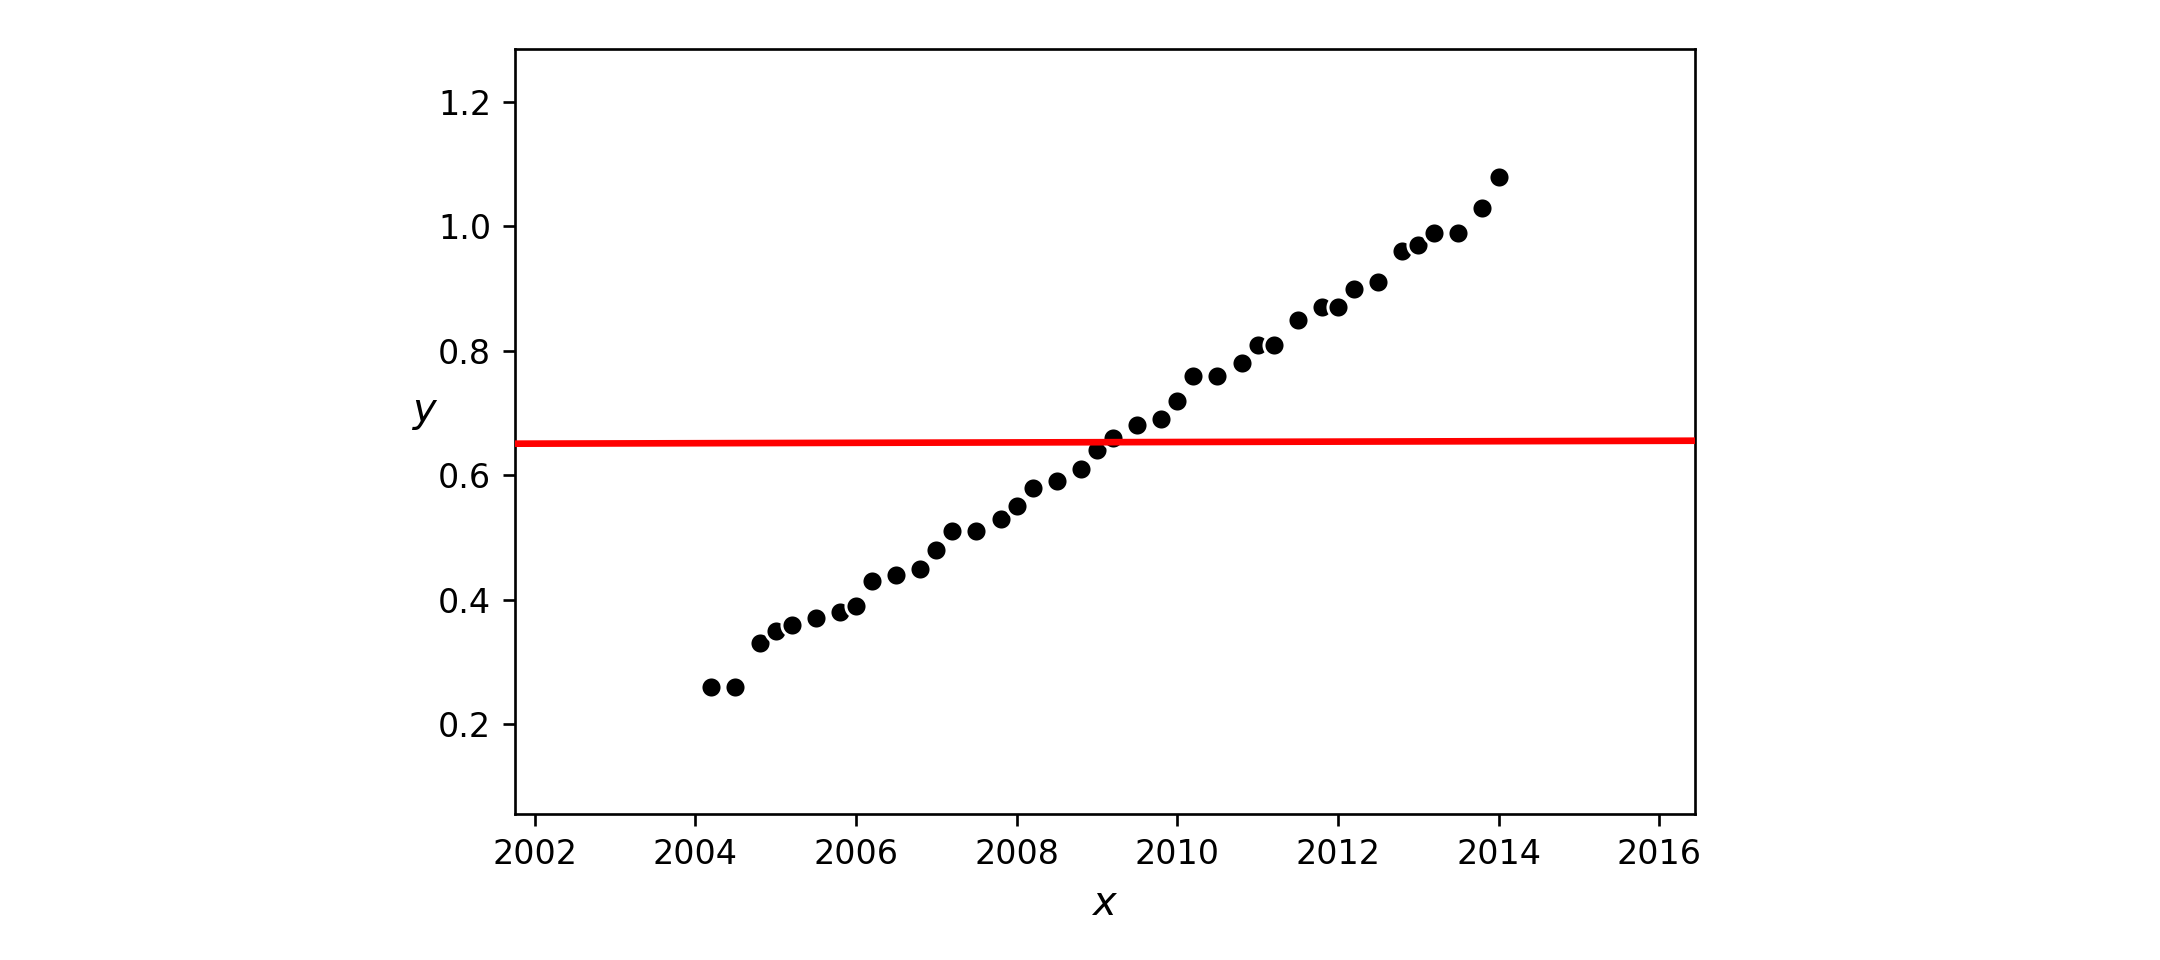

In [72]:
# the original data and best fit line learned from our gradient descent run
ind = np.argmin(cost_history)
least_weights = weight_history[ind]
demo.plot_fit(plotting_weights = [least_weights],colors = ['r'])

We now normalize the input of this dataset and re-run gradient descent at the same initial point.

<IPython.core.display.Javascript object>


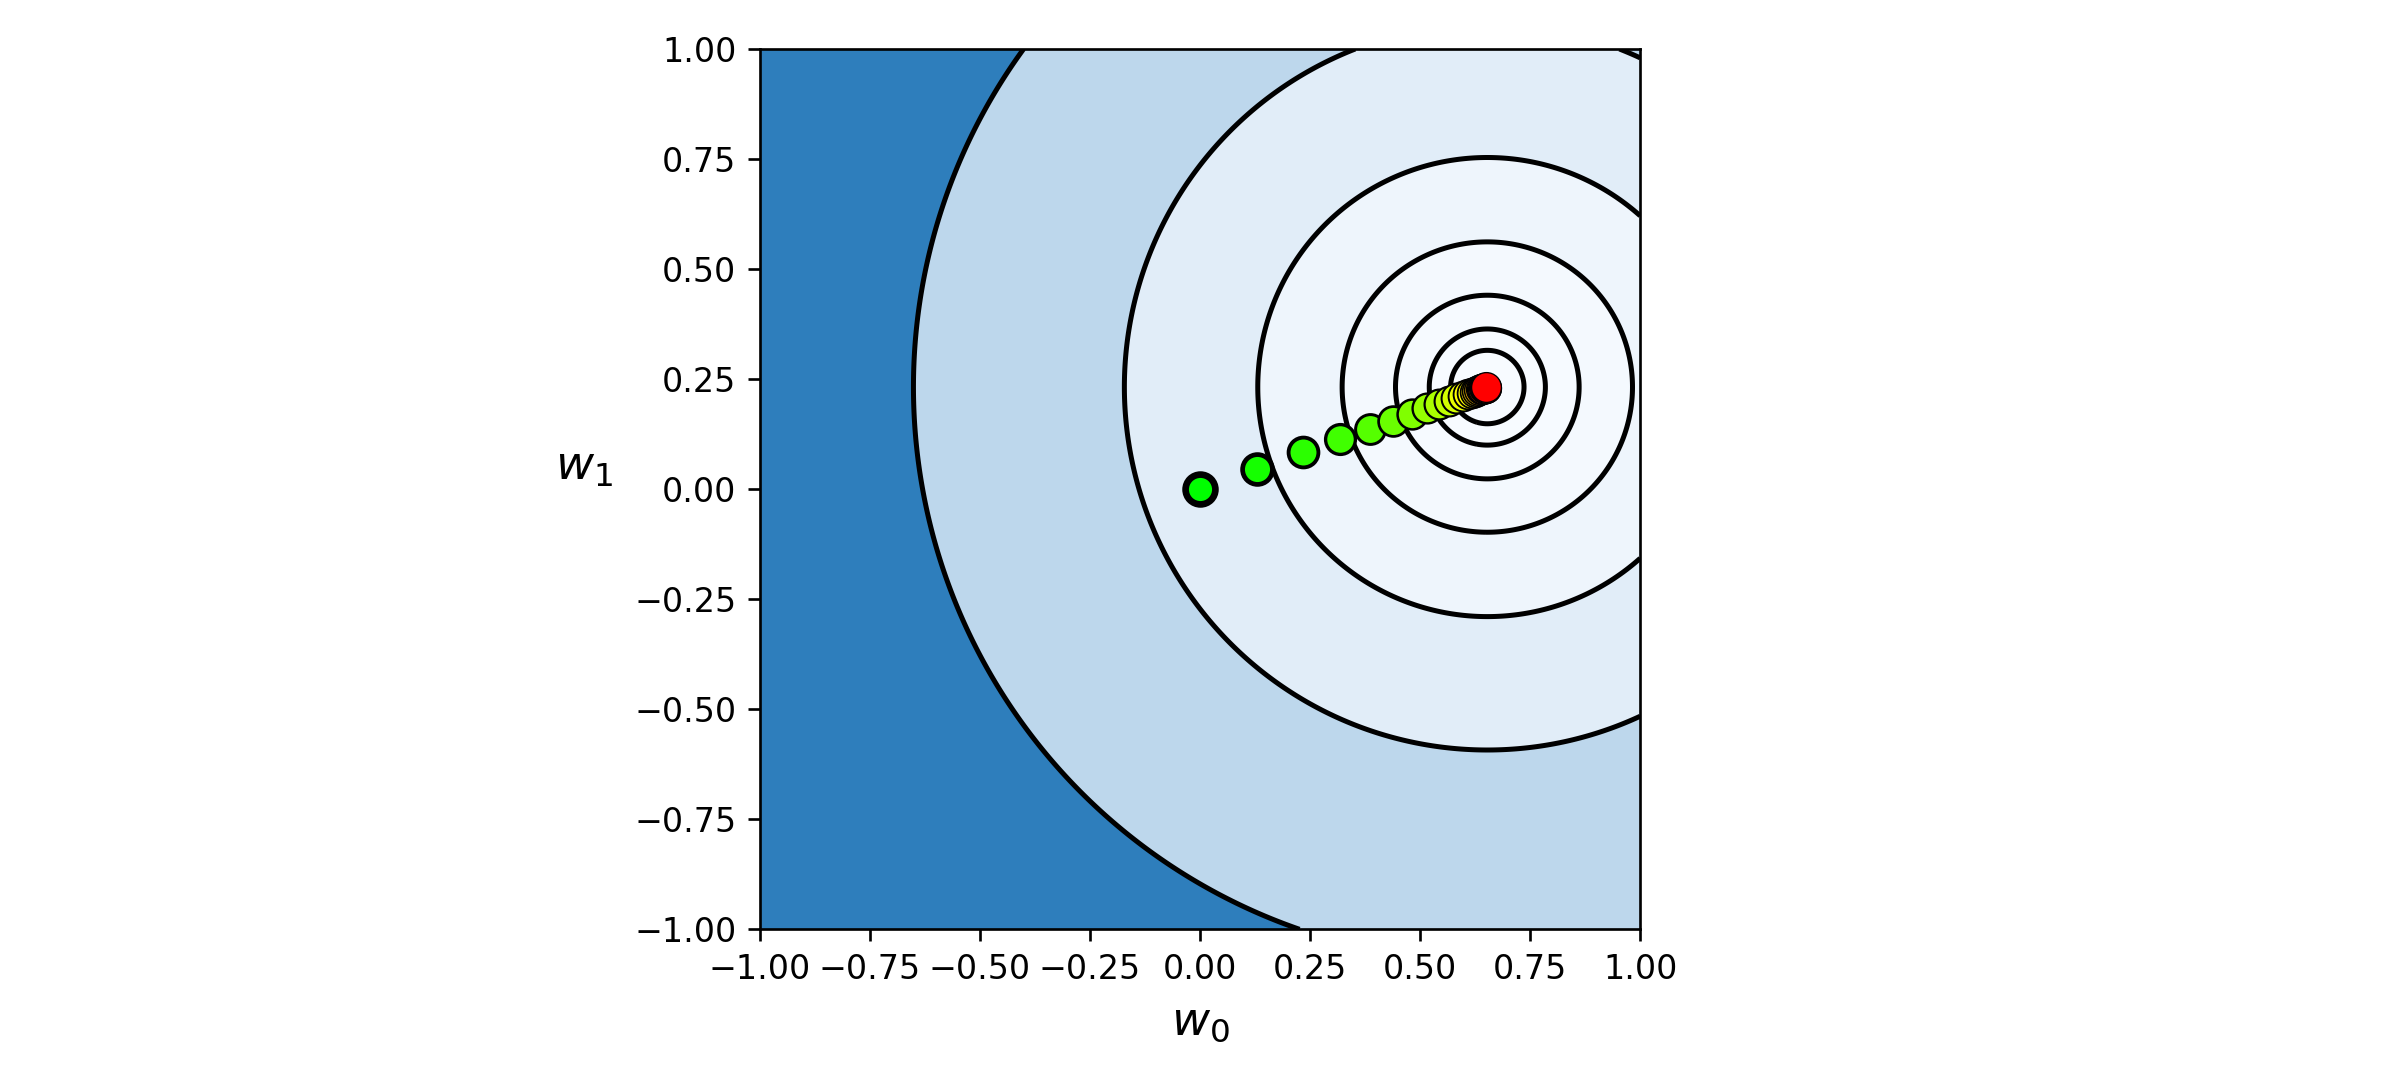

In [73]:
# create normalizer based on input
normalizer,inverse_normalizer = standard_normalizer(x)

# normalize input by subtracting off mean and dividing by standard deviation
x_normalized = normalizer(x)

# an implementation of the least squares cost function for linear regression, precisely
# what was shown in Section 8.1 but here pulled in from a backend file
least_squares_2 = cost_lib.choose_cost(x_normalized,y,'least_squares')

# run gradient descent to minimize the Least Squares cost for linear regression
g = least_squares_2; w = np.array([0.0,0.0])[:,np.newaxis]; max_its = 25; alpha_choice = 10**(-1);
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,w)

# show run on contour plot
static_plotter.two_input_contour_plot(g,weight_history,xmin = -1,xmax = 1,ymin = -1,ymax = 1,num_contours = 7,show_original = False,arrows = False)

The corresponding fit line - again where we normalize each new testing input as $\text{normalized_predictor}\left(x\right) = w_0^{\star} + w_1^{\star}\left(\frac{x - \mu}{\sigma}\right)$ - is significantly higher quality than the unnormalized result.

<IPython.core.display.Javascript object>


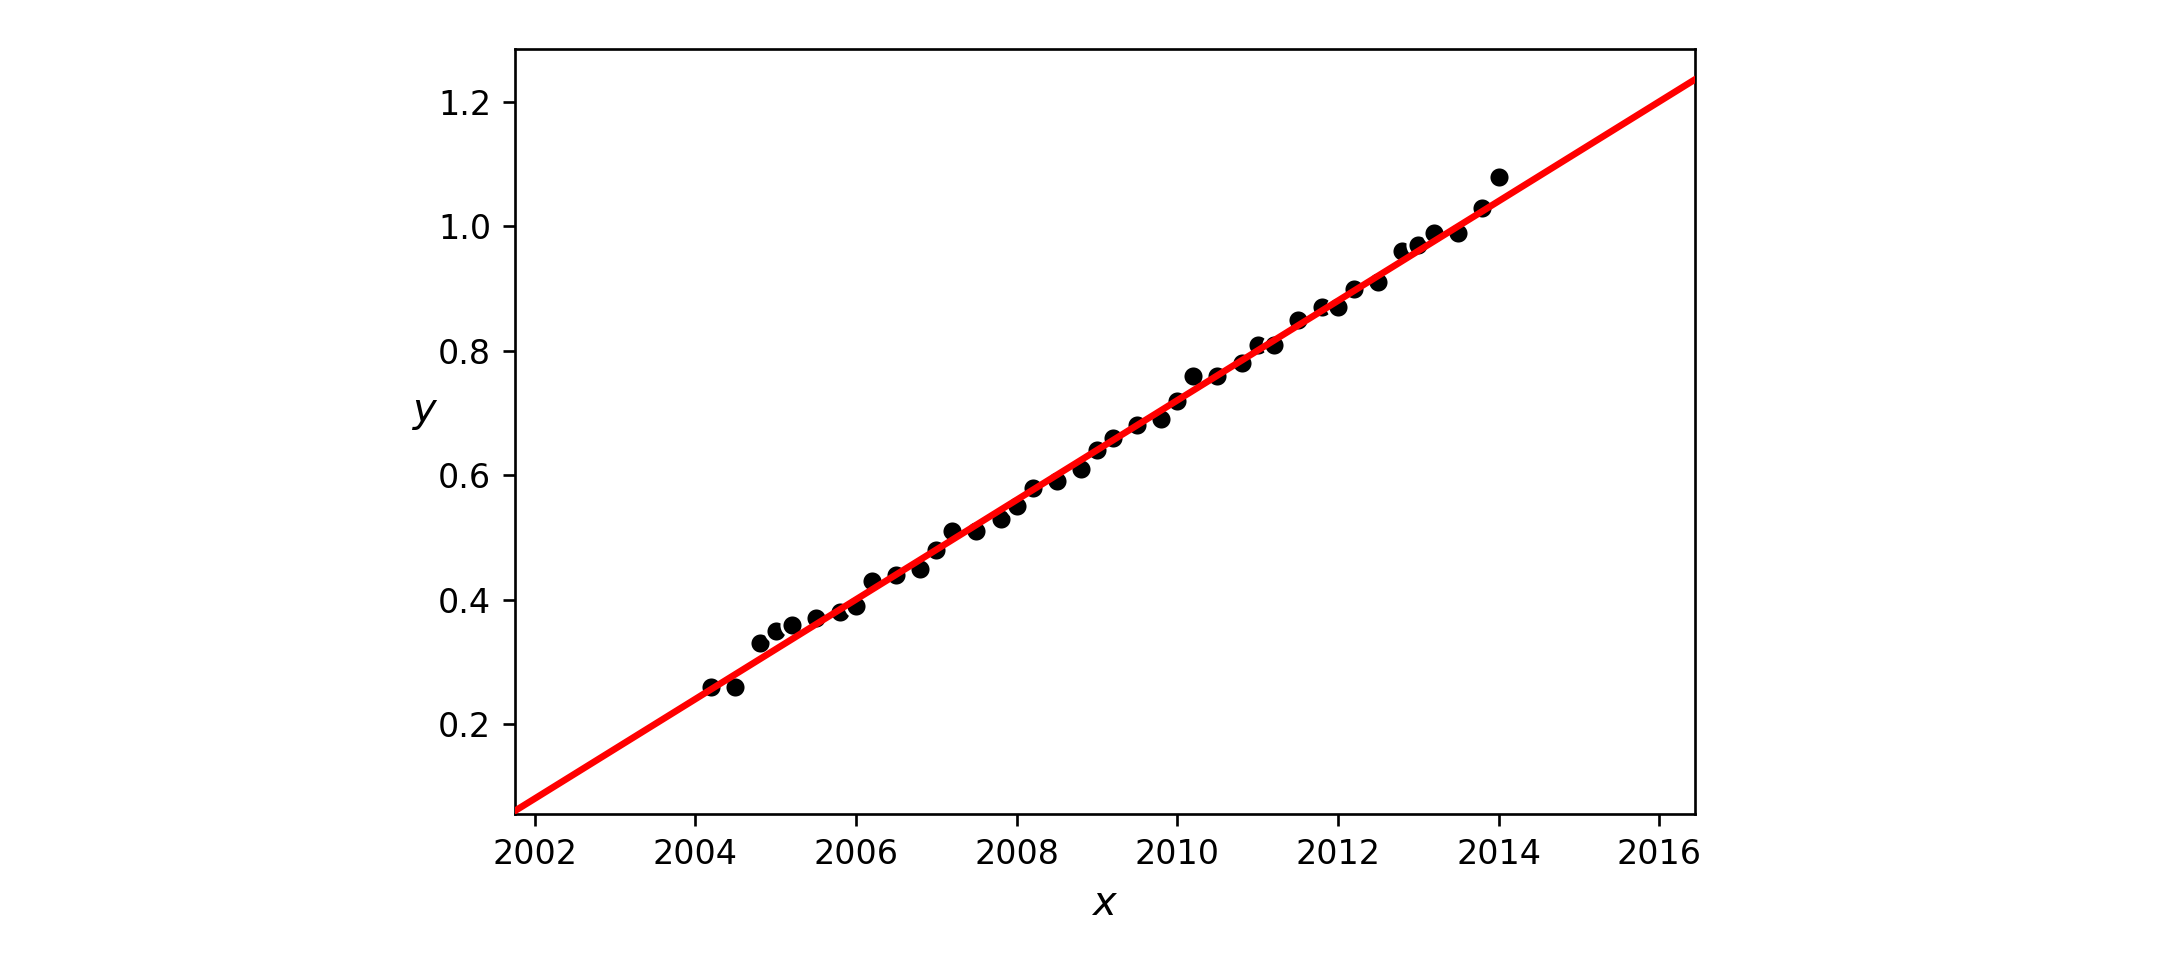

In [74]:
# the original data and best fit line learned from our gradient descent run
ind = np.argmin(cost_history)
least_weights = weight_history[ind]
demo.plot_fit(plotting_weights = [least_weights],colors = ['r'],transformers = [normalizer])

# Exercise 9.4. Least Squares and perfectly circular contours: part 1

In Section 5.1.5 we showed that the Least Squares cost function is *always* a convex quadratic of the form 

\begin{equation}
g\left(\mathbf{w}\right) = a^{\,} + \mathbf{b}^T\mathbf{w}^{\,} + \mathbf{w}^T\mathbf{C}^{\,}\mathbf{w}^{\,}
\end{equation}

where the matrix $\mathbf{C}$ - which generates the quadratic - takes the form

\begin{equation}
\mathbf{C} = \frac{1}{P}\sum_{p=1}^{P}\mathring{\mathbf{x}}_{p}^{\,} \mathring{\mathbf{x}}_{p}^T.
\end{equation}

First suppose we are dealing with the $N = 1$ input case, then our data is

\begin{equation}
\mathring{\mathbf{x}}_p=\begin{bmatrix}
1 \\
x_{p}
\end{bmatrix},\,\,\,\, p = 1,...,P.
\end{equation}

Now suppose we normalize the input - we would then replace each $\mathbf{x}_p$ above with

\begin{equation}
\mathring{\mathbf{x}}_p=\begin{bmatrix}
1 \\
\frac{x_{p} - \mu_{\,}}{\sigma}
\end{bmatrix},\,\,\,\, p = 1,...,P.
\end{equation}

Expanding out the $2\times 2$ matrix $\mathbf{C}$ with our normalized input we can write it as 

\begin{equation}
\mathbf{C} = \begin{bmatrix}
1 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{p} - \mu_{\,}}{\sigma} \right) \\
\frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{p} - \mu_{\,}}{\sigma} \right)  \,\,\,\,\,\,\,\, \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{p} - \mu_{\,}}{\sigma} \right)^2 
\end{bmatrix}.
\end{equation}

However this matrix can be simplified extensively, since by definition we have

\begin{array}
\
\frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{p} - \mu_{\,}}{\sigma} \right) = \frac{1}{\sigma}\left( \frac{1}{P}\sum_{p=1}^{P} x_{p} - \mu_{\,} \right) = \frac{1}{\sigma}\left( \mu - \mu_{\,} \right)  = 0 \\
 \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{p} - \mu_{\,}}{\sigma} \right)^2  = \frac{1}{\sigma^2} \left(\frac{1}{P}\sum_{p=1}^{P}\left( x_{p} - \mu_{\,} \right)^2\right) = \frac{\sigma^2}{\sigma^2} = 1.
\end{array}

This means that $\mathbf{C}$ simplifies to

\begin{equation}
\mathbf{C}=
\begin{bmatrix}
1 \,\,\,\,\, 0 \\
0 \,\,\,\,\, 1 
\end{bmatrix}
\end{equation}

whose maximum / minimum eigenvalue is $1$.  Since it is indeed the eigenvalues of such a matrix that determine the shape of a quadratic - and this matrix indicates that both the axes of the quadratic are equal in length - the Least Squares cost associated with the normalized input does indeed have perfectly circular contours.  

This trend does not carry over perfectly to higher dimensions when standard normalization is applied to the input of a regression dataset.  However it will when we see a more advanced input normalization called PCA sphereing in Chapter 11.

For the general $N$ dimensional case our generic data now looks like

\begin{equation}
\mathring{\mathbf{x}}_p=\begin{bmatrix}
1 \\
x_{1,p} \\
x_{2,p} \\
\vdots \\
x_{N,p} \\
\end{bmatrix},\,\,\,\, p = 1,...,P.
\end{equation}

and normalized data

\begin{equation}
\mathring{\mathbf{x}}_p=\begin{bmatrix}
1 \\
\frac{x_{1,p} - \mu_{1}}{\sigma_1} \\
\frac{x_{2,p} - \mu_{2}}{\sigma_2} \\
\vdots \\
\frac{x_{N,p} - \mu_{N}}{\sigma_N} \\
\end{bmatrix},\,\,\,\, p = 1,...,P.
\end{equation}

where $\mu_n$ and $\sigma_n$ is the mean and standard deviation along the $n^{th}$ coordinate of the input.

The corresponding $\left(N+1\right) \times \left(N+1\right)$ matrix $\mathbf{C}$ will then take the form 

\begin{equation}
\mathbf{C} = \begin{bmatrix}
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,  1 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,   \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{1,p} - \mu_{1}}{\sigma_{1}} \right)  \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,  \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{2,p} - \mu_{2}}{\sigma_{2}} \right)  \,\,\,\,\,\,\,\,\,\,\, \cdots \,\,\,\,\, \cdots \,\,\,\,\, \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{N,p} - \mu_{N}}{\sigma_{N}} \right)  \\
 \,\,\,\,\,\, \,\,\,\,\, \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{1,p} - \mu_{1}}{\sigma_{1}} \right)  \,\,\,\,\,\,\,\,\, \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{1,p} - \mu_{1}}{\sigma_{1}} \right)^2   \,\,\,\,\,\,\,\,\,\,\, \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{1,p} - \mu_{1}}{\sigma_{1}} \right)\left( \frac{x_{2,p} - \mu_{2}}{\sigma_{2}} \right)
\cdots \,\,\,\,\,\,\,\,\,\,\, \cdots  \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{1,p} - \mu_{1}}{\sigma_{1}} \right)\left( \frac{x_{N,p} - \mu_{N}}{\sigma_{N}} \right) \\
 \,\,\,\,\,\,\,\,\,\,\,  \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{2,p} - \mu_{2}}{\sigma_{2}} \right)  \,\,\,\,\,\,\,\,\,  \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{1,p} - \mu_{1}}{\sigma_{1}} \right)\left( \frac{x_{2,p} - \mu_{2}}{\sigma_{2}} \right)  \,\,\,\,\,\,\,\,\,\,\,     \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{2,p} - \mu_{2}}{\sigma_{2}} \right)^2 
\cdots \,\,\,\,\,\,\,\,\,\,\, \cdots   \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{2,p} - \mu_{2}}{\sigma_{2}} \right)\left( \frac{x_{N,p} - \mu_{N}}{\sigma_{N}} \right)   \\
\,\,\,\,\,\,\,\,\,\,\, \vdots  \,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\,  \vdots \,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\, \vdots \,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\, \vdots \,\,\,\,\,\,\,\,\,\,\,
\end{bmatrix}.
\end{equation}

This  matrix simplifies dramatically since $ \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{n,p} - \mu_{n}}{\sigma_{n}} \right)  = 0$ and  $\sqrt{\frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{n,p} - \mu_{n}}{\sigma_{n}} \right)^2}  = 1$ for all $n = 1,...,N$.  The only entries remaining in the matrix that are not equal to $0$ and $1$ are the cross-terms.  In particular the $\left(n,m\right)^{th}$ entry is

\begin{equation}
c_{n,m} = \frac{1}{P}\sum_{p=1}^{P}\left( \frac{x_{n,p} - \mu_{n}}{\sigma_{n}} \right)\left( \frac{x_{m,p} - \mu_{m}}{\sigma_{m}} \right).
\end{equation}

Finally we have via the dot product rule that 

\begin{equation}
-1 \leq c_{n,m} \leq 1.
\end{equation}

Thus the matrix reduces to 

\begin{equation}
\mathbf{C} = 
\begin{bmatrix}
1 \,\,\,\,\,\,\,\,\,\, 0 \,\,\,\,\,\,\,\,\,\, 0 \,\,\,\,\,\,\,\,\,\, 0 \,\,\,\,\, \cdots \,\,\,\,\, 0 \\
0 \,\,\,\,\,\,\,\,\,\, 1 \,\,\,\,\,\,\,\,\,\, c_{2,3} \,\,\,\,\,\,\, c_{2,4} \cdots  c_{2,N} \\
0 \,\,\,\,\,\,\,\,\,\,  c_{3,2} \,\,\,\,\,\,\,\,\,\, 1  \,\,\,\,\,\,\, c_{3,4} \cdots  c_{3,N} \\
0 \,\,\,\,\,\,\,\,\,\,  c_{4,2} \,\,\,\,\,\,\,\,\,\, c_{4,3}  \,\,\,\,\,\,\, 1 \cdots  c_{4,N} \\
\vdots \,\,\,\,\,\,\,\,\,\, \vdots \,\,\,\,\,\,\,\,\,\, \,\,\,\, \vdots  \,\,\,\, \,\,\,\, \vdots  \,\, \cdots \,\, \vdots \\
\end{bmatrix}.
\end{equation}

Since the off-diagonal entries here are not necessarily zero it is not necessarily an identity matrix, which would generate a quadratic with perfectly circular contours.  

# Exercise 9.5. Breast cancer dataset

Below we will compare a run of gradient descent on standard and normalized data using a real $N = 8$ input breast cancer dataset, a description of which you can find below (you must copy and paste this link into the browser for it to direct you properly)

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

First we load in the data and convert the data below.

In [75]:
# load in original dataset
import pandas as pd
data = pd.read_csv(datapath + 'breast_cancer_original.txt',header = None)

# drop user id column
data.drop(0, axis=1, inplace=True)

# replace '?' missing entries with np.nan values
data.replace('?', np.nan,inplace = True)

# replace arbitrary label values with pm 1
data[10].replace([2,4],[-1,1],inplace = True)

# convert all entries to floats
data = data.astype(float)

# convert dataframe to numpy array
data = data.values

# cut into input/output pairs
x = data[:,:-1].T
y = data[:,-1:].T

Now we create a standard normalization function that can determine and replace missing entries.

In [76]:
# return normalization functions based on input x
normalizer,inverse_normalizer = standard_normalizer(x)

# normalize input by subtracting off mean and dividing by standard deviation
x_normalized = normalizer(x)

Below we run gradient descent for $100$ iterations, using $\alpha = 10^{-1}$ the largest steplength parameter of the form $10^{-\gamma}$ that produced convergence.

In [77]:
# load in cost function
softmax = cost_lib.choose_cost(x,y,'softmax')
counting_cost = cost_lib.choose_cost(x,y,'counter')

# load in an optimizer
g = softmax; w = 0.1*np.random.randn(x.shape[0]+1,1); max_its = 100; alpha_choice = 10**(-1);
weight_history_1,cost_history_1 = optimizers.gradient_descent(g,alpha_choice,max_its,w)
count_history_1 = [counting_cost(v) for v in weight_history_1]

Now we normalize the input and create corresponding softmax and counting cost functions, and then perform the same run using the same initial point and number of descent steps.

In [78]:
# create normalizer
normalizer,inverse_normalizer = standard_normalizer(x)

# normalize input
x_normalized = normalizer(x)

# make new costs for normalized data
softmax_2 = cost_lib.choose_cost(x_normalized,y,'softmax')
counting_cost_2 = cost_lib.choose_cost(x_normalized,y,'counter')

# load in an optimizer
g = softmax_2; alpha_choice = 10**(0);
weight_history_2,cost_history_2 = optimizers.gradient_descent(g,alpha_choice,max_its,w)
count_history_2 = [counting_cost_2(v) for v in weight_history_2]

Below we plot the cost and misclassification histories from our two runs of gradient descent.  As can be seen, the run on the normalized input (in magenta) converges much faster.

<IPython.core.display.Javascript object>


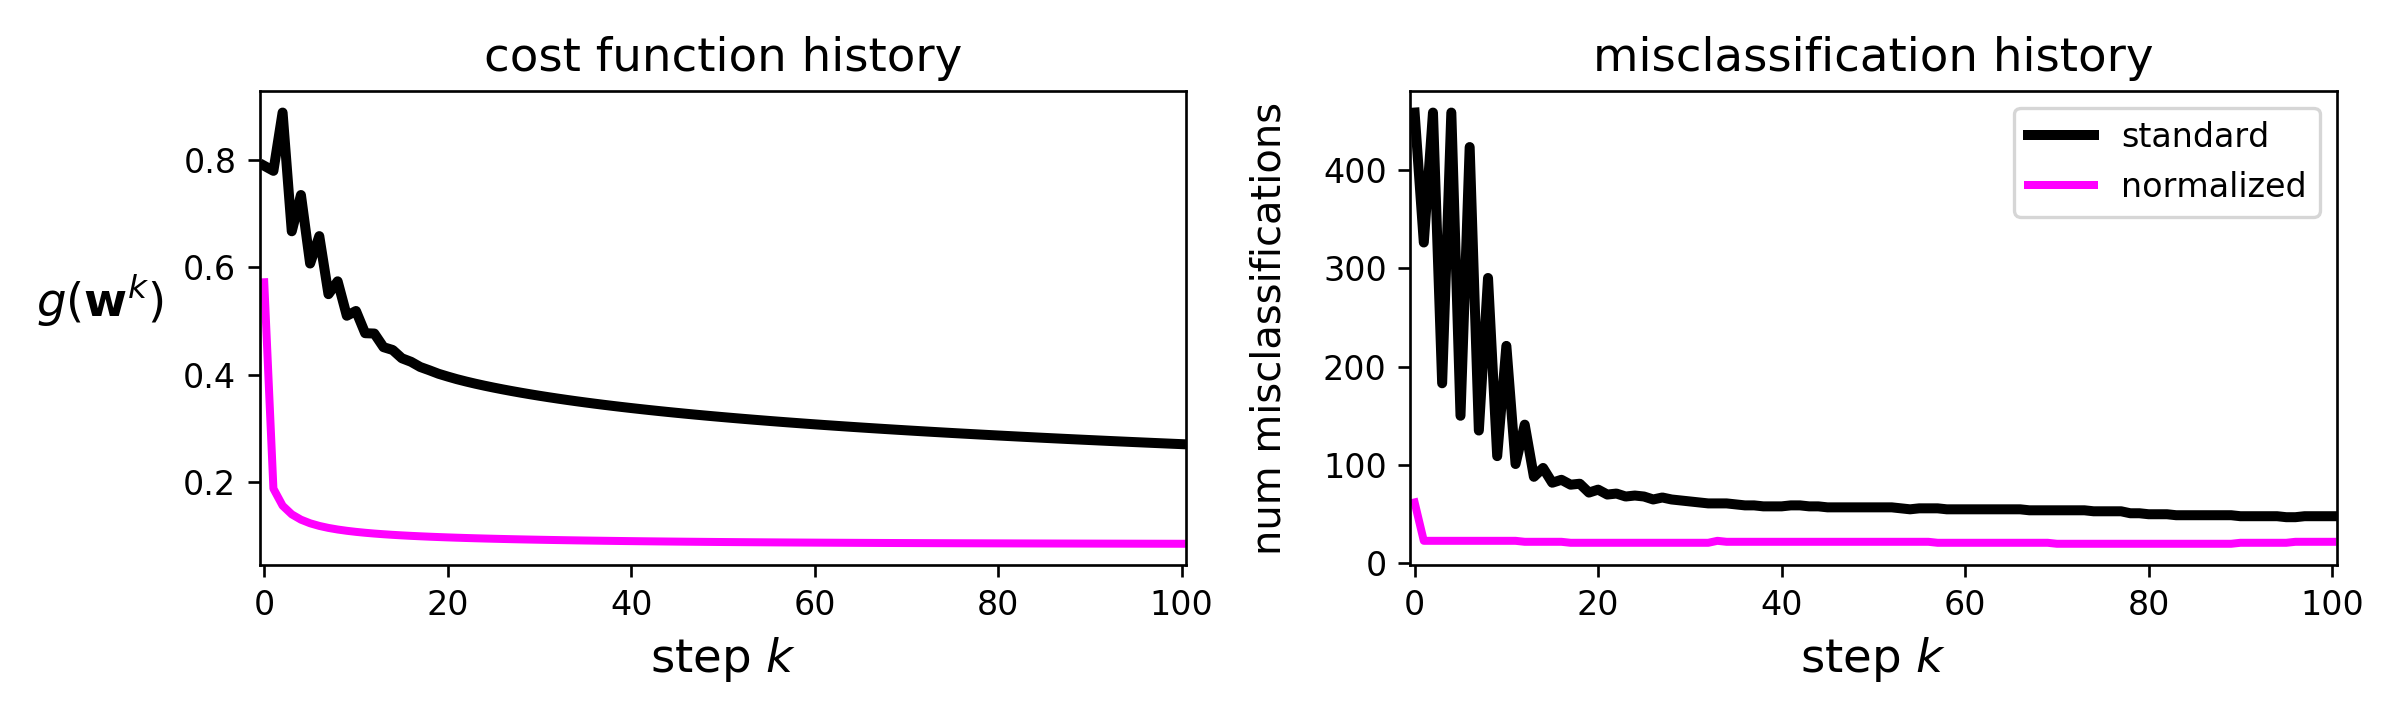

In [79]:
# plot the cost function history for a given run
static_plotter = superlearn.classification_static_plotter.Visualizer()
static_plotter.plot_cost_histories([cost_history_1,cost_history_2],[count_history_1,count_history_2],start = 0,labels = ['standard','normalized'])

# Exercise 9.6. PCA-sphering and the Least Squares cost for linear regression

# Exercise 9.7. Comparing standard normalization to PCA sphering on MNIST

Below we provide a `Python` implementation of PCA-sphereing.  The input to the function `PCA_sphereing` is a data matrix `x`, and it returns two functions `normalizer` - that one can use to perform sperehing on any input (both training and future test points) - and `inverse_normalizer` that can be used to reverse the operation.  One can notice that the only difference between how the method is detailed above and the actual implementation is implementing step 3 we divide off the square root of the *eigenvalues* of the regularized covariance matrix.  This is done for computational efficiency's sake since - as we discuss in the next Section - the $n^{th}$ eigenvalue $d_n$ actually equals the variance of the PCA-transformed data i.e., $d_n = \sigma_n^2$, so dividing off its square root is equal to dividing off by the standard deviation.

In [80]:
# compute eigendecomposition of data covariance matrix for PCA transformation
def PCA(x,**kwargs):
    # regularization parameter for numerical stability
    lam = 10**(-7)
    if 'lam' in kwargs:
        lam = kwargs['lam']

    # create the correlation matrix
    P = float(x.shape[1])
    Cov = 1/P*np.dot(x,x.T) + lam*np.eye(x.shape[0])

    # use numpy function to compute eigenvalues / vectors of correlation matrix
    d,V = np.linalg.eigh(Cov)
    return d,V

# PCA-sphereing - use PCA to normalize input features
def PCA_sphereing(x,**kwargs):
    # Step 1: mean-center the data
    x_means = np.mean(x,axis = 1)[:,np.newaxis]
    x_centered = x - x_means

    # Step 2: compute pca transform on mean-centered data
    d,V = PCA(x_centered,**kwargs)

    # Step 3: divide off standard deviation of each (transformed) input, 
    # which are equal to the returned eigenvalues in 'd'.  
    stds = (d[:,np.newaxis])**(0.5)
    normalizer = lambda data: np.dot(V.T,data - x_means)/stds

    # create inverse normalizer
    inverse_normalizer = lambda data: np.dot(V,data*stds) + x_means

    # return normalizer 
    return normalizer,inverse_normalizer

In this and the following example we compare runs of gradient descent on various real datasets using a) the original input, b) standard normalized input, and c) PCA sphered input.  The `Python` function can be used to loop over three gradient descent runs using a single cost function with each version of the data loaded in.  Three steplength parameter inputs allow one to adjust and compare steplength choices for each run.

As we saw when comparing standard normalization to original input in Sections 8.4, 9.4, and 10.3 we will typically find that a substantially larger steplength value can be used when comparing a run on original data to one on standard normalized data, and likewise when comparing a run on standard normalized data to one in which the input was first PCA sphered.  The intuition behind why this is possible - first detailed in Section 8.4.3 - is that PCA sphereing tends to make the contours of a cost function even more 'circular' than standard normalization, and the more circular a cost function's contours become the larger the steplength one can use because the gradient descent direction aligns more closely with the direction one must travel in to reach a true global minimum of a cost function.  

In [81]:
# This code cell will not be shown in the HTML version of this notebook
def identity(x):
    normalizer = lambda data: data
    inverse_normalizer = lambda data: data
    return normalizer,inverse_normalizer

def compare_schemes(x,y,costname,countname,alpha1,alpha2,alpha3,max_its):     
    # parameters for all gradient descent runs
    C = len(np.unique(y))
    if C == 2:
        C-=1
    
    # create initialization
    w = 0.0*np.random.randn(x.shape[0]+1,C)
    
    # gradient descent loop
    cost_histories = []
    count_histories = []
    for transform,alpha_choice in zip([identity,standard_normalizer,PCA_sphereing],[alpha1,alpha2,alpha3]): 
        #### transform input data ####
        # transform data
        normalizer,inverse_normalizer = transform(x)

        # normalize input
        x_transformed = normalizer(x)
        
        #### make cost and misclassification counter based on transformed input ####
        # create cost and counter
        cost = cost_lib.choose_cost(x_transformed,y,costname)
        count = cost_lib.choose_cost(x_transformed,y,countname)
        
        #### run gradient descent ####
        # make run of gradient descent
        weight_history,cost_history = optimizers.gradient_descent(cost,alpha_choice,max_its,w)
        
        # compute number of misclassifications
        count_history = [count(v) for v in weight_history]
        cost_histories.append(cost_history)
        count_histories.append(count_history)
    return cost_histories,count_histories

Next we illustrate a run on each type of input using $50,000$ handwritten digits from the [MNIST dataset](http://scikit-learn.org/stable/datasets/index.html) - consisting of hand written digits between 0 and 9.  These images have been contrast normalized, a common pre-processing technique for image based data we discuss in Chapter 16. 

We pick steplength values precisely as done in the previous dataset, and again find that we pick much larger values when comparing runs on the original to that of the standard normalized input, and this to the PCA sphered input.

In [82]:
from sklearn.datasets import fetch_openml
# import MNIST
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# re-shape input/output data
x = x.T
y = np.array([int(v) for v in y])[np.newaxis,:]

print("input shape = " , x.shape)
print("output shape = ", y.shape)

input shape =  (784, 70000)
output shape =  (1, 70000)


Randomly sample input / output pairs.

In [83]:
# sample indices
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]

In [222]:
# # create normalizer
# normalizer,inverse_normalizer = standard_normalizer(x_sample.T)

# # normalize input
# x_sample = normalizer(x_sample.T).T

In [84]:
# run comparison module above
alpha_orig = 10**(-5);  alpha_standard = 10**(-1); alpha_pca_sphered = 100;  costname = 'multiclass_softmax'; countname = 'multiclass_counter';
max_its = 10
cost_histories,count_histories = compare_schemes(x_sample,y_sample,costname,countname,alpha_orig,alpha_standard,alpha_pca_sphered,max_its)

Plotting the resulting cost function histories we can see how the run on standard normalized data converges rapidly in comparison to the raw data, and how the run on PCA sphered data converges even more rapidly still.

<IPython.core.display.Javascript object>


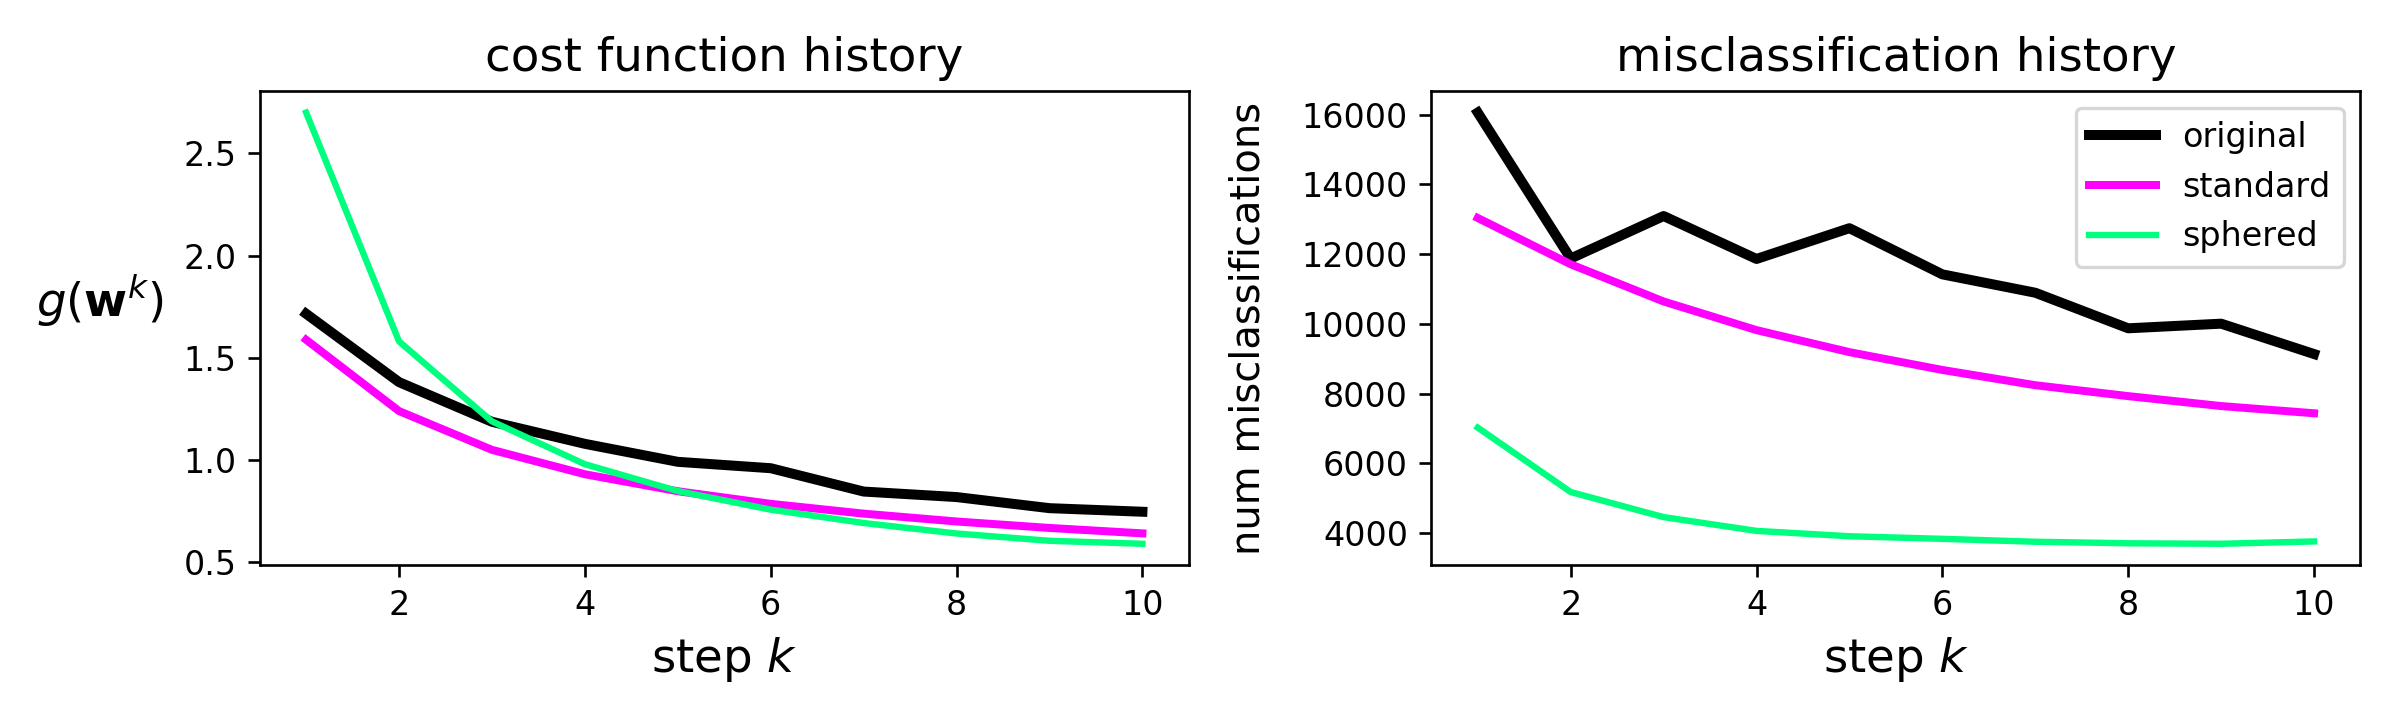

In [85]:
# compare cost / count histories
static_plotter = superlearn.classification_static_plotter.Visualizer()
static_plotter.plot_cost_histories(cost_histories,count_histories,start = 1,labels = ['original','standard','sphered'])

# Exercise 9.8. Least Squares and perfectly circular contours: part 2

**Fact number 1:**  Recall that the Least Squares cost function for linear regression is *always*, regardless of the dataset, an upward facing ("positive semi-definite") quadratic function.


**Fact number 2:**  A single Newton step (in principle) perfectly minimizes such an upward facing quadratic in a *single step*, since the Newton step is based on minimizing a function's second order Taylor series approximation (which in this case is precisely the quadratic function itself).

**Fact number 4:**  After PCA-sperhing a Least Squares cost it becomes a simple quadratic function, and the Hessian $\nabla g\left(\mathbf{w}\right)$ is *diagonal*, containing only the pure second derivatives $\frac{\partial^2}{\partial w_j^2}g\left(\mathbf{w}\right)$ along its diagonal.

**Therefore** the single Newton step one can use to perfectly minimize the PCA-sphered Least Squares reduces precisely to the "simplified" Newton step described in Appendix A, where we purposefully (to greatly simplify computation / diminish storage of the Hessian) take Newton steps using precisely such a the diagonalized Hessian matrix.

# Exercise 9.9. Exploring predictors of housing prices

Below we show the results of running the boosting procedure detailed above - using a Least Squares cost and Newton's method optimizer - and the Boston Housing dataset which can be [downloaded here](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).  This dataset consists of a set of basic statistics on $506$ homes in the city of Boston in the US.  The input statistics are to be used to predict the median value of each car.  The $N=13$ dimensional input features include:  per capita crime rate by town (feature $1$), average number of rooms per dwelling (feature $6$), weighted distances to five Boston employment centers (feature $8$), and the percentage of the local population deemed 'lower class' (denoted LSTAT, feature $13$).

The result of running $M=5$ rounds of boosting is visualized in the top panel below.  This special kind of cost function history was used in the prior example, and in this plot each weight / feature added to the model at each round of boosting is shown along the horizontal axis (starting with the bias which has index $0$).  As we can see, the first two features found via boosting that most correlate with the output are *LSTAT* (the top feature, number $13$) and the *average number of rooms per dwelling* (the second most important feature, number $6$).  Examining the histogram of model weights in the bottom panel, we can see that unsurprisingly the LSTAT value is highly negatively correlated with the output (median home value) while the average number of rooms feature is positively correlated with the output.

<IPython.core.display.Javascript object>


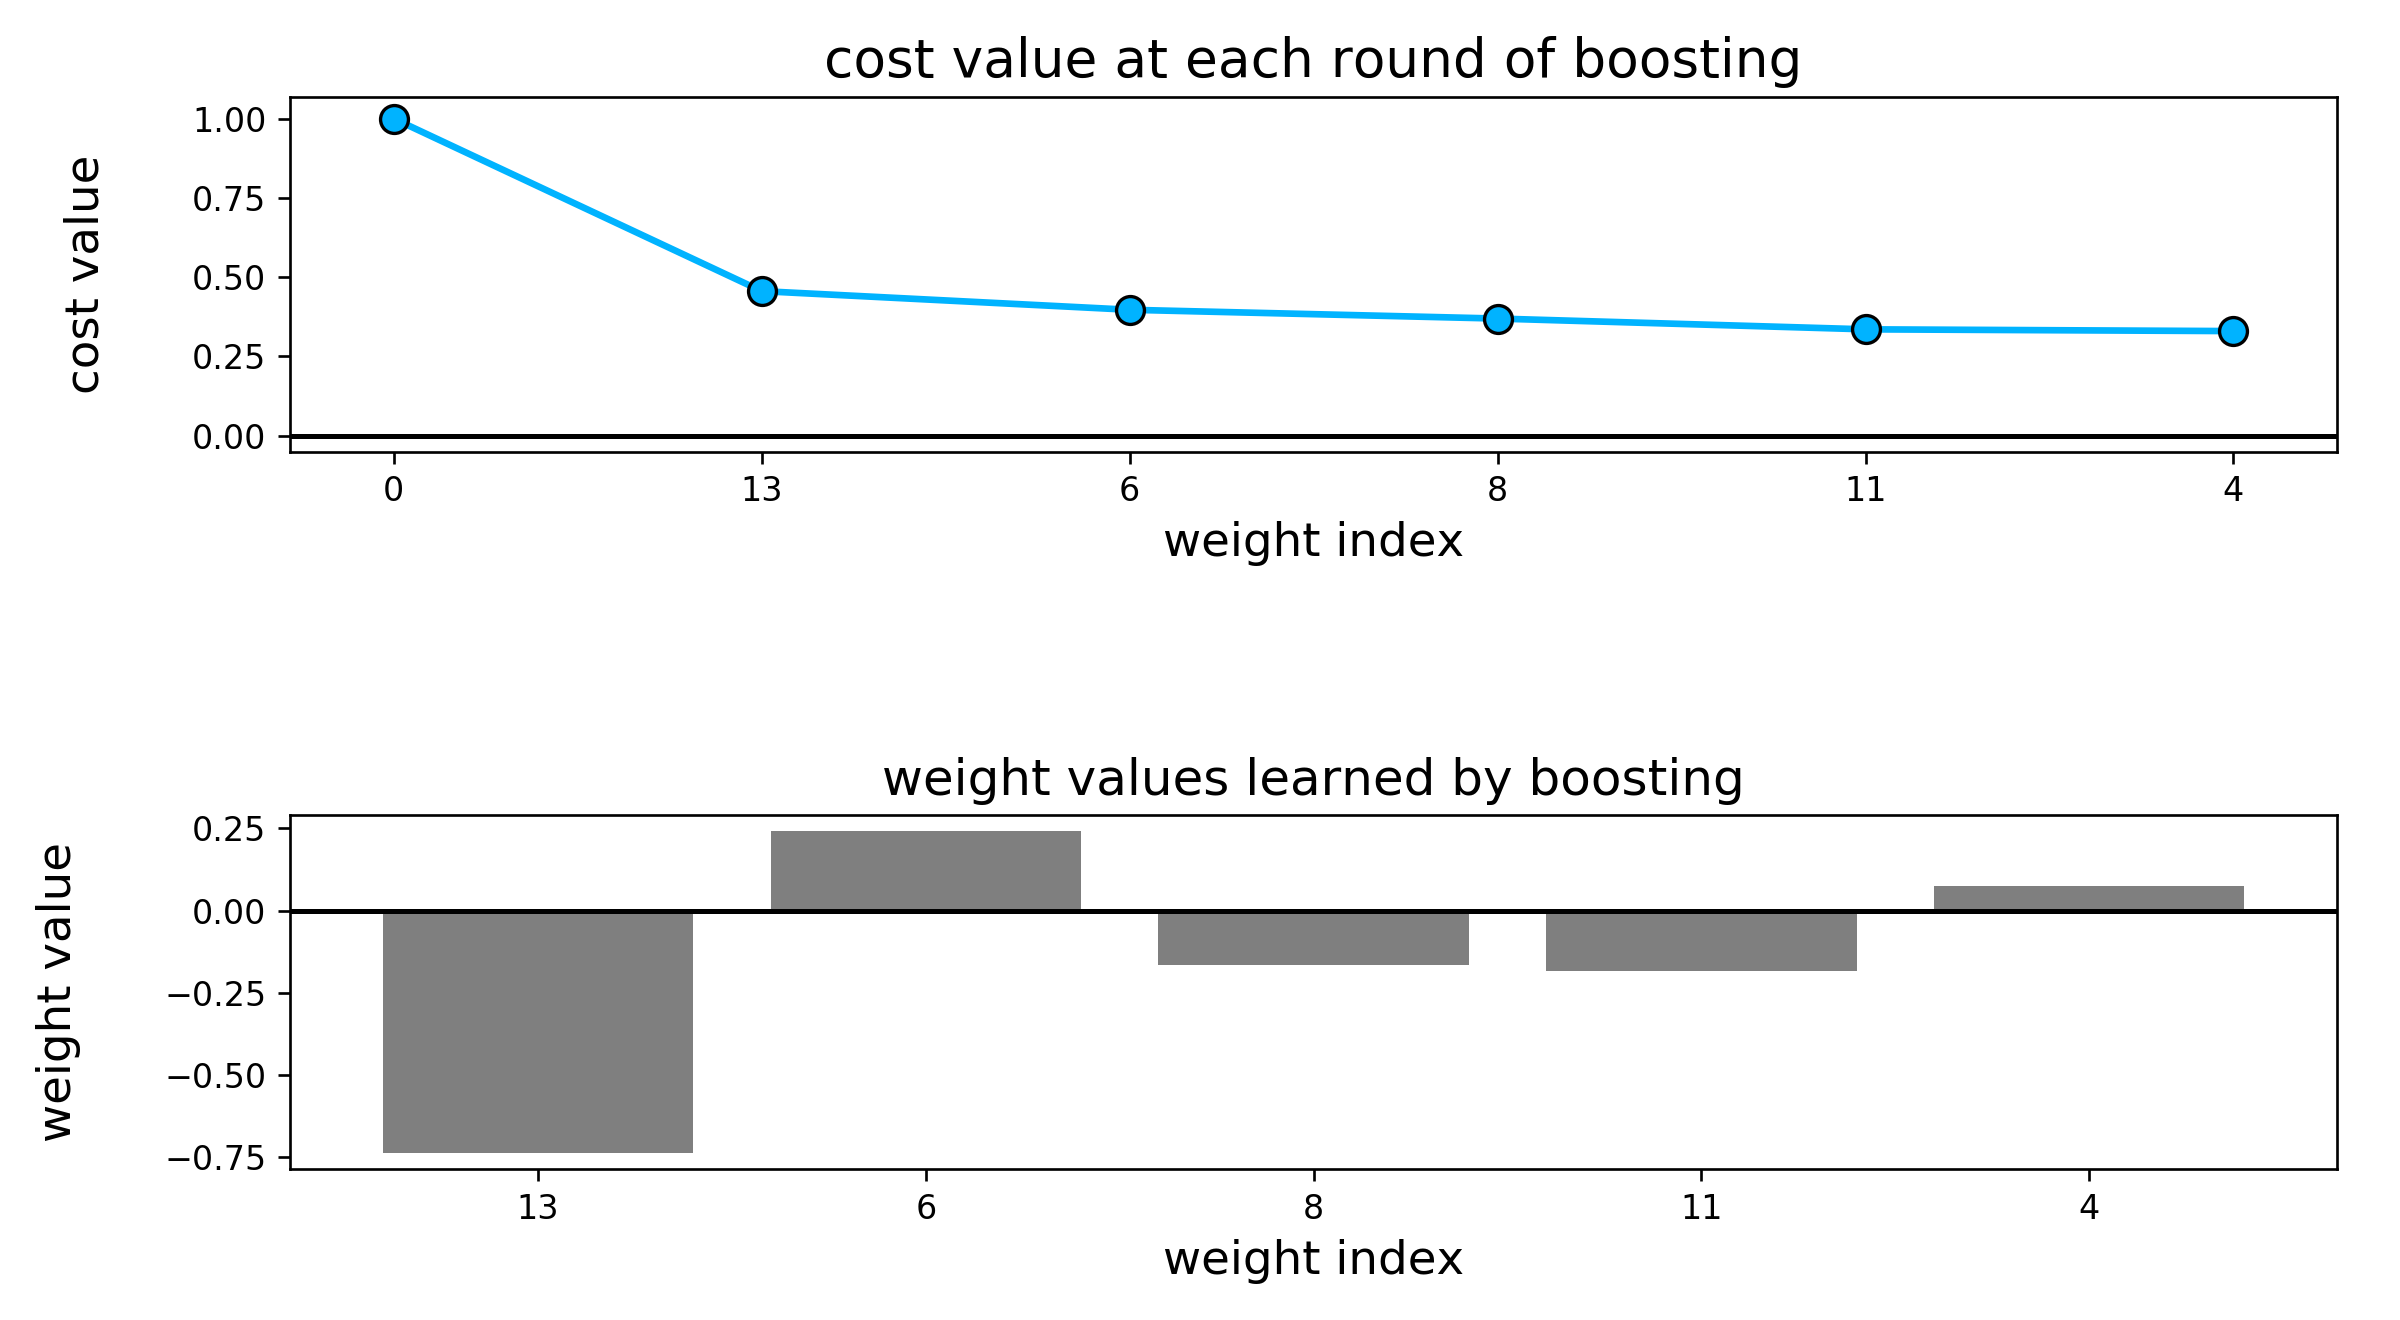

In [93]:
# load in data
csvname =  datapath + 'boston_housing.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import booster
mylib = superlearn.boost_lib.superlearn_setup.Setup(x,y)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'least_squares')

# choose optimizer
mylib.choose_optimizer('newtons_method',max_its=1)

# run boosting
mylib.boost(num_rounds=5)

# plot round history
mylib.plot_history()

# Exericise 9.10. Predicting Miles-per-Gallon in automobiles

Below we show the results of running the boosting procedure detailed above - using a Least Squares cost and Newton's method optimizer - and a slightly adjusted version of the *Auto-Mpg* dataset which can be [downloaded here](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).  This dataset consists of a set of basic statistics on $398$ automobiles.  The input statistics are to be used to predict the Miles Per Galon (MPG) of each car.  The $N=6$ dimensional input features include: number of cylinders in the car's engine block (feature $1$), the total engine displacement (feature $2$), the horsepower of the car's motor (feature $3$), the weight of the car (feature $4$), the car's acceleration ability measured in seconds taken to accelerate to a benchmark speed from standstill (feature $5$), and the year the car was produced (feature $6$).  The final feature of the original dataset (called 'origin') was removed as no meaningful description of it could be found.

The result of running $M=6$ rounds of boosting is visualized in the top panel below.  This is a special kind of cost function history plot where the weight / feature added to the model at each round of boosting is shown along the horizontal axis (starting with the bias which has index $0$).  As we can see, the first two features found via boosting that most correlate with the output are the *car's weight* (the top feature, number $4$) and the production year of the car (the second most important feature, number $6$).  

<IPython.core.display.Javascript object>


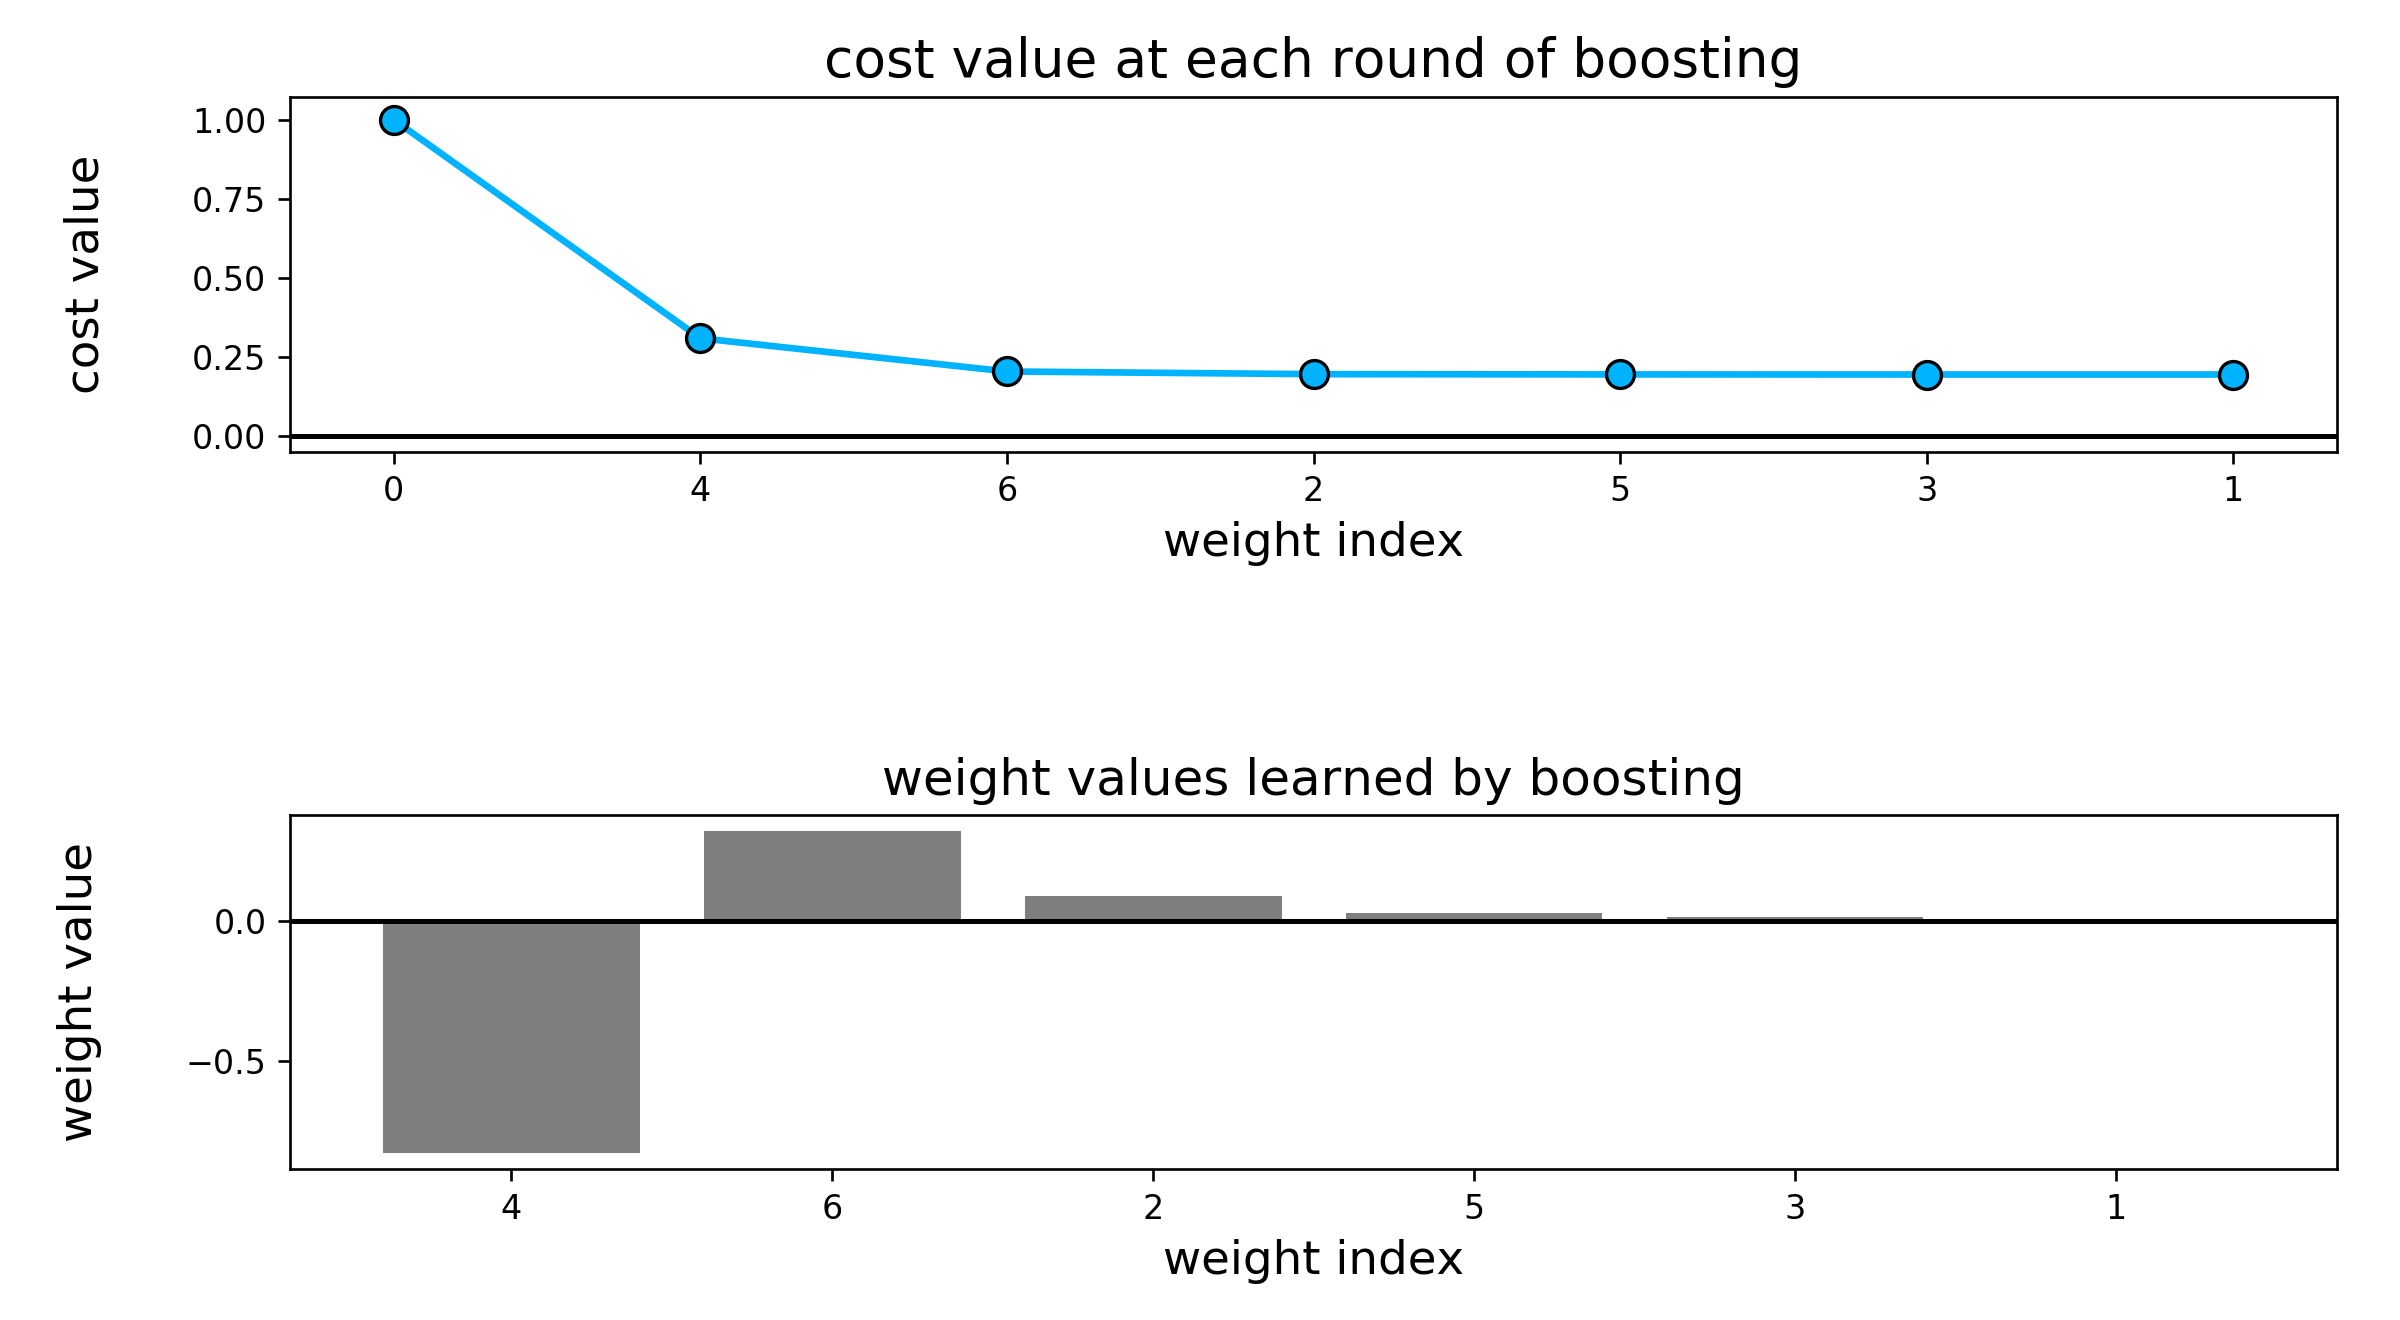

In [94]:
## This code cell will not be shown in the HTML version of this notebook
# load in data
csvname =  datapath + 'auto_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-2,:]
y = data[-1:,:] 

# import booster
mylib = superlearn.boost_lib.superlearn_setup.Setup(x,y)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'least_squares')

# choose optimizer
mylib.choose_optimizer('newtons_method',max_its=1)

# run boosting
mylib.boost(num_rounds = 6)

# plot round history
mylib.plot_history()

In the bottom panel we show a histogram of the model weight *values* which tells us how each input feature correlates with the output.  It is not very surprising that *weight* is highly negatively correlated with *MPG*, as typically *heavy* cars will have *low* MPGs.  If we plot this normalized feature against the normalized MPG output - as shown below - we can clearly see this negative correlation in the data itself.

<IPython.core.display.Javascript object>


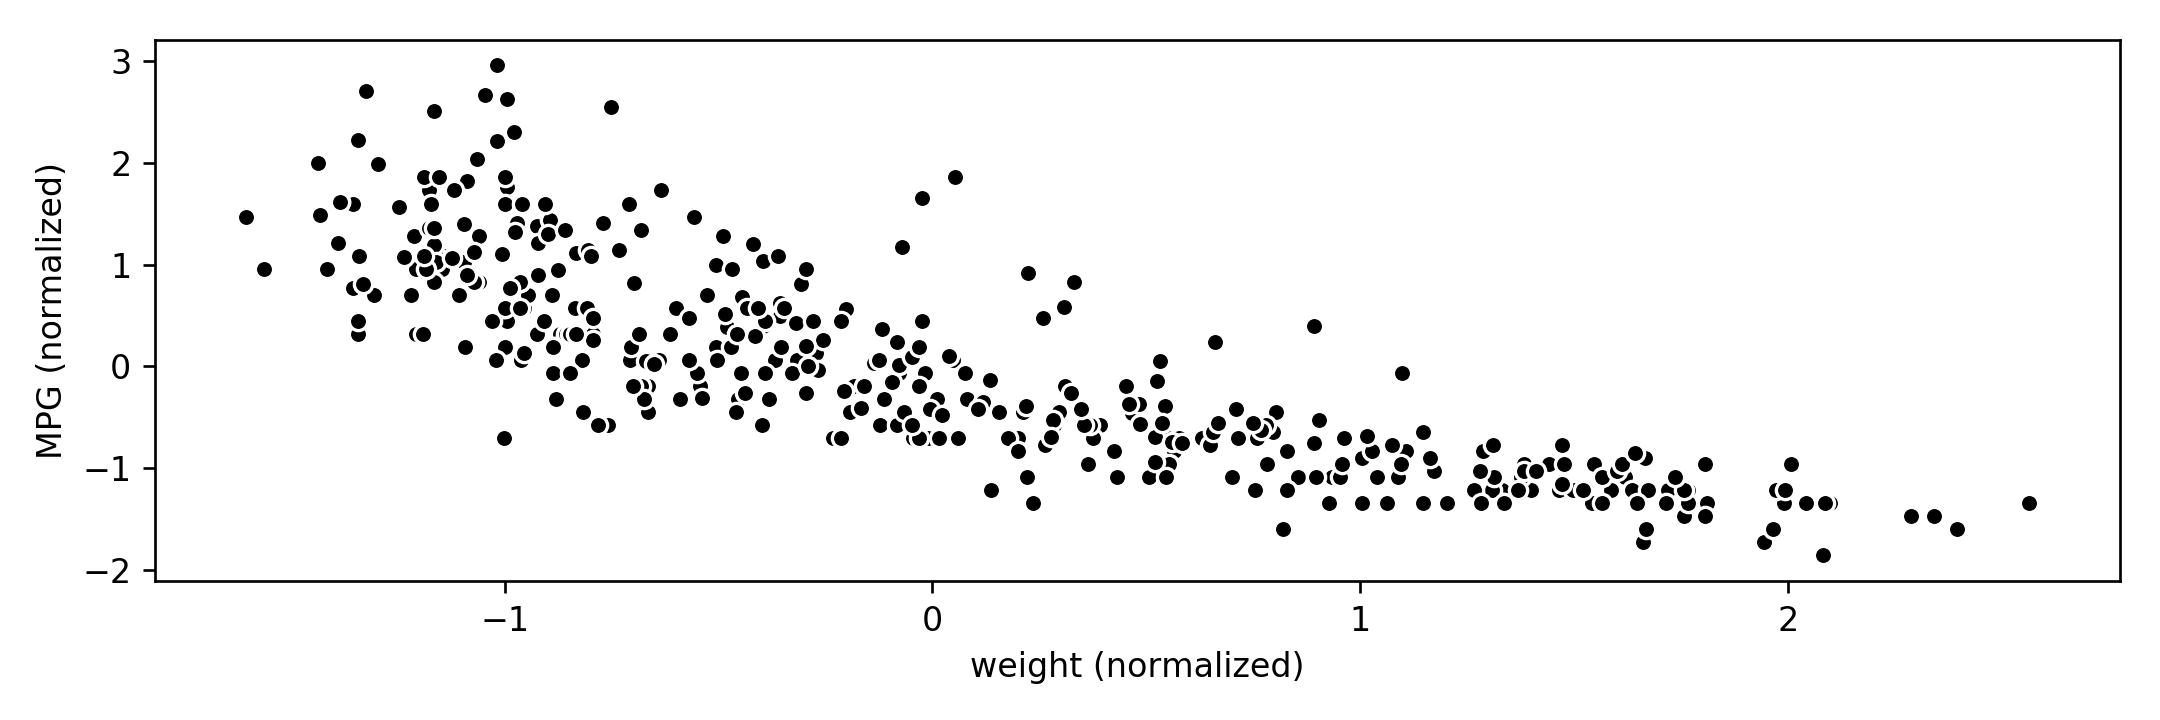

In [95]:
## This code cell will not be shown in the HTML version of this notebook
mylib.plot_regress(4,labels=['weight (normalized)','MPG (normalized)'])

We can also see in the bottom panel of the figure above that the *production year* is *positively* correlated with the output, which is sensible as well as *older* cars will often have *lower* MPG as well (due to parts wearing down, older technology, etc.,).  Plotting this normalized feature versus the normalized output - as shown below - we can see this positive correlation in the data itself.

<IPython.core.display.Javascript object>


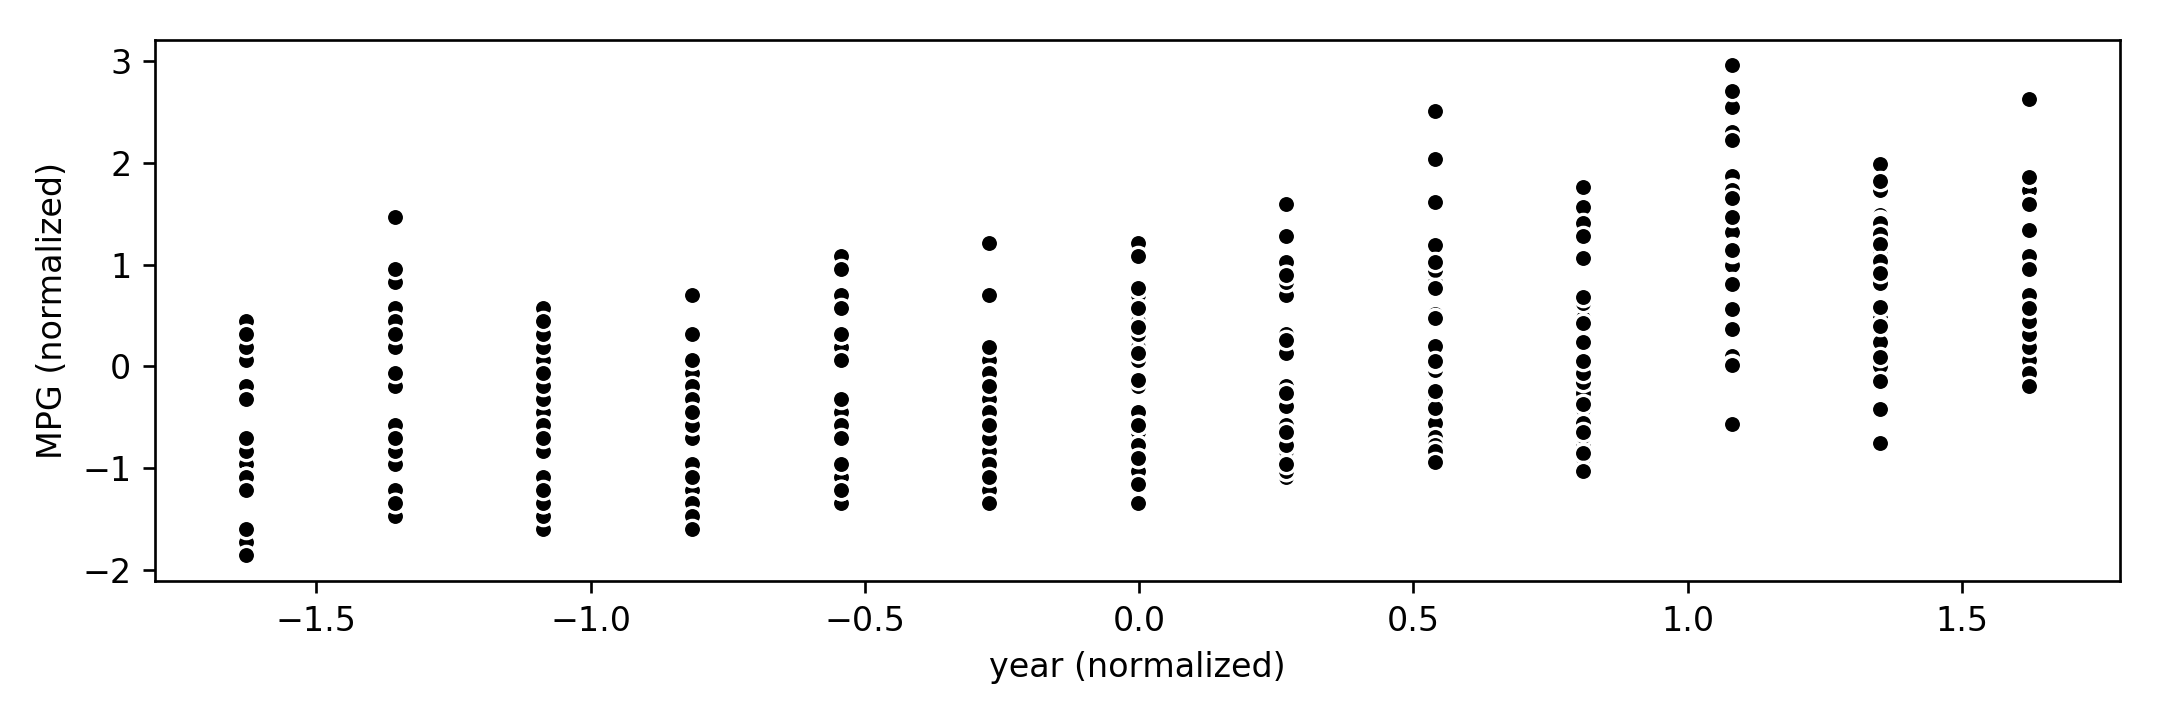

In [96]:
## This code cell will not be shown in the HTML version of this notebook
mylib.plot_regress(6,labels=['year (normalized)','MPG (normalized)'])

# Exercise 9.11.  Studying important predictors of credit risk

Below we show the results of running the boosting procedure detailed above - using a Softmax cost and Newton's method optimizer - and a slightly adjusted version of the *German Credit* dataset which can be [downloaded here](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29).  

This is a two-class classification dataset consisting of $1000$ samples, each a set of statistics extracted from loan application to a German bank.  Each input then has an associated label - either a 'good' or 'bad' credit risk as determined by financial professionals.  In constructing a learned classifier for this dataset we create an auotmatic credit risk assessment tool that can help decide whether or not future applicants are good candidates for loans.

The $N=20$ dimensional input features includes features like: the individual's current account balance with the bank (feature 1), the duration (in months) of previous credit with the bank (feature 2), the payment status of any prior credit taken out with the bank (feature 3), the amount of credit currently had with the bank (feature 4), and the current value of their Savings/Stocks (feature 6).  These are precisely the top five features found via boosting.  As we can see in the bottom panel, unsurprisingly most of these top features are positively correlated with an individual being a 'good' or 'bad' credit risk.

<IPython.core.display.Javascript object>


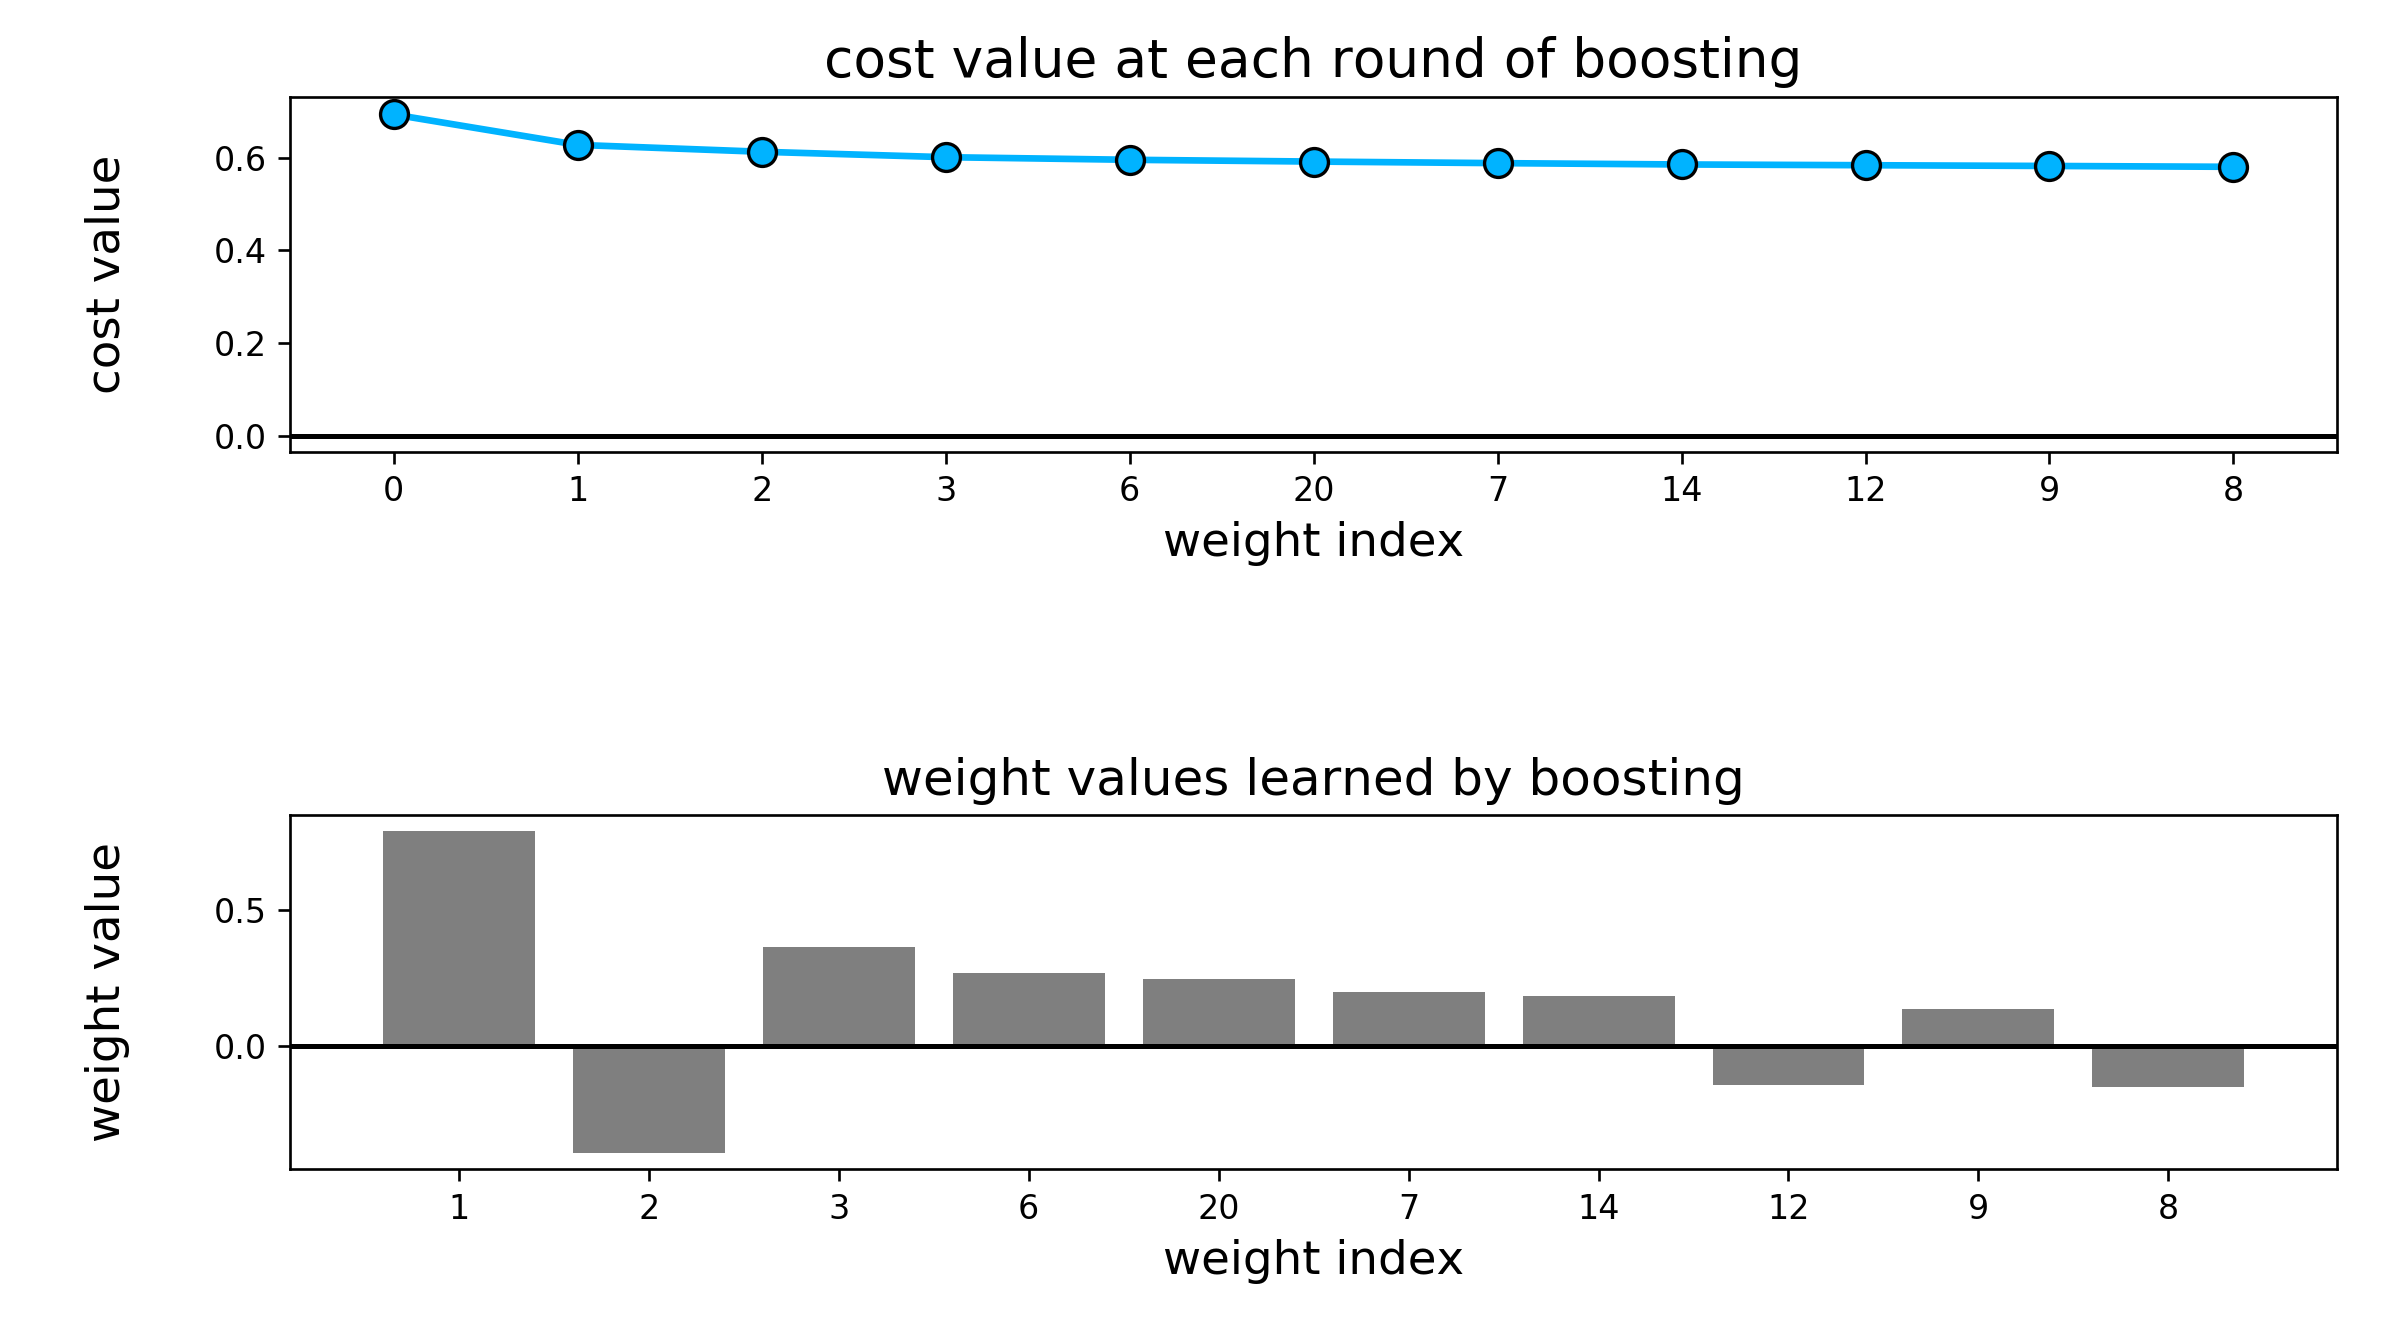

In [97]:
# load in dataset
csvname = datapath + 'credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import booster
mylib = superlearn.boost_lib.superlearn_setup.Setup(x,y)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'softmax')

# choose optimizer
mylib.choose_optimizer('newtons_method',max_its=10)

# run boosting
mylib.boost(num_rounds=10)

# plot round history
mylib.plot_history()

# Exercise 9.12.  Exploring predictors of housing prices

In this example we use the Boston Housing dataset first introduced in Example 1 of the previous Section.  This dataset consists of $P=506$ datapoints with $N=13$ input features relating various statistics about homes in the Boston area to their median values (in U.S. dollars).  We use $\ell_1$ regularization with $50$ evenly spaced values for $\lambda$ in the range $\left[0, 130 \right]$.  Shown in the animated figure below is a histogram of the optimal *feature-touching* weights recovered by minimizing an $\ell_1$ regularized Least Squares cost function with these various $\lambda$ values.  In each case we run $1000$ steps of gradient descent were taken with $\alpha = 10^{-1}$ for all runs. 

Moving the slider from its starting position on the left (where $\lambda = 0$) rightwards increases the value of $\lambda$ and the associated optimal set of weights are shown.  Pushing the slider all the way to the right shows the optimal weights resulting in using the maximum value for $\lambda$ used in these experiments.  As you move the slider from left to right you can see how the resulting optimal featre-touching weights begin to *sparsify*, with many of them diminishing to near zero values.  By the time $\lambda \approx 75$ three major weights remain, corresponding to feature $6$, feature $13$, and feature $11$.  The first two features ($6$ and $13$) were also determined to be important via boosting - and can be easily interpreted. 

In comparison to the result found via boosting, the third feature $11$ found to be important here was *not* found to be as important via boosting.  Conversely as $\lambda$ is increased to even small values notice how many of the large (in magnitude) feature-touching weights seen when $\lambda = 0$ quickly disappear - in particular feature-touching weights $8$ and $11$ rapidly vanish (which were deemed more important when applying boosting).

In [ ]:
# load in data
csvname =  datapath + 'boston_housing.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import booster
mylib = superlearn.reg_lib.superlearn_setup.Setup(x,y)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(cost_name = 'least_squares',reg_name = 'L1')

# choose optimizer
mylib.choose_optimizer('gradient_descent',max_its=1000,alpha_choice=10**(-1))

# run regularization
lams = np.linspace(0,mylib.x.shape[0]*10,20)
mylib.tryout_lams(lams)


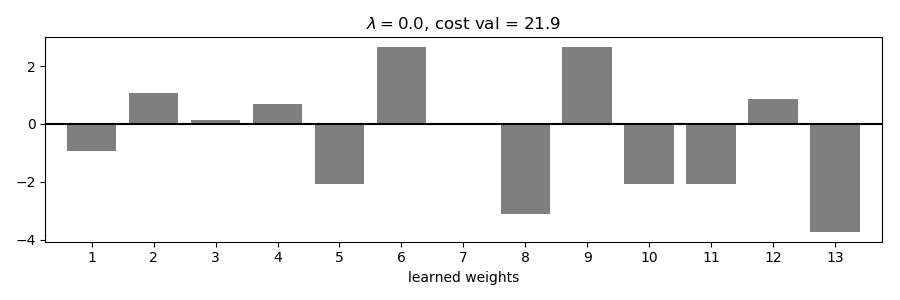
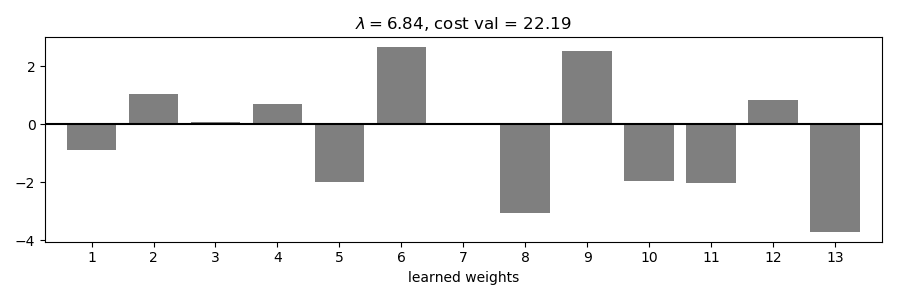
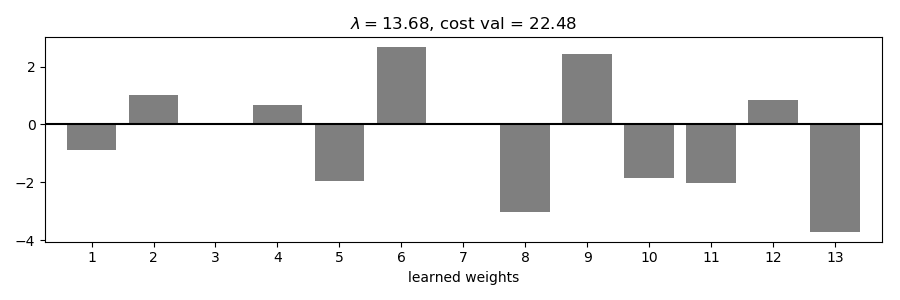
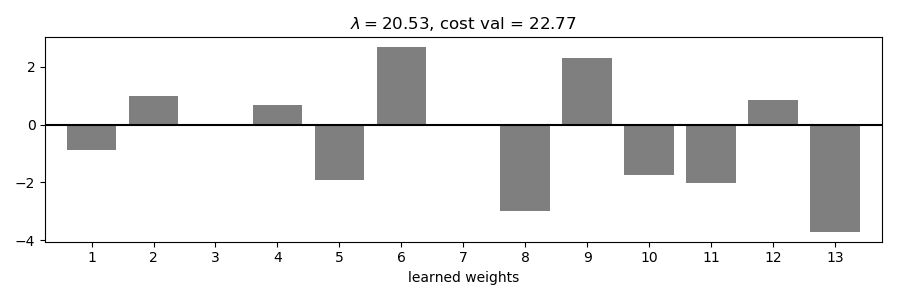
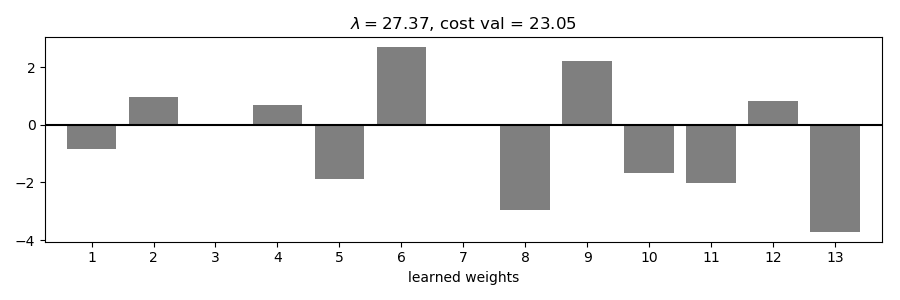
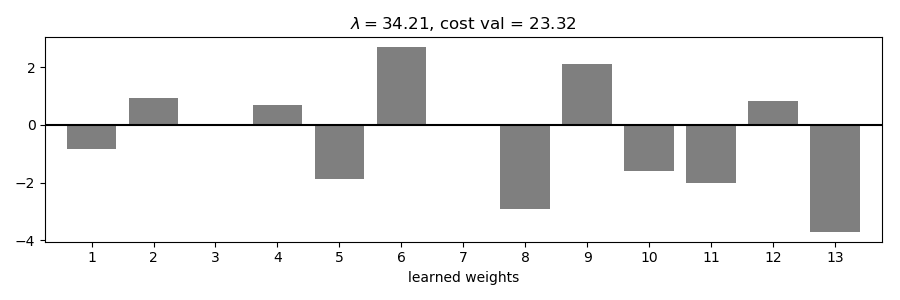
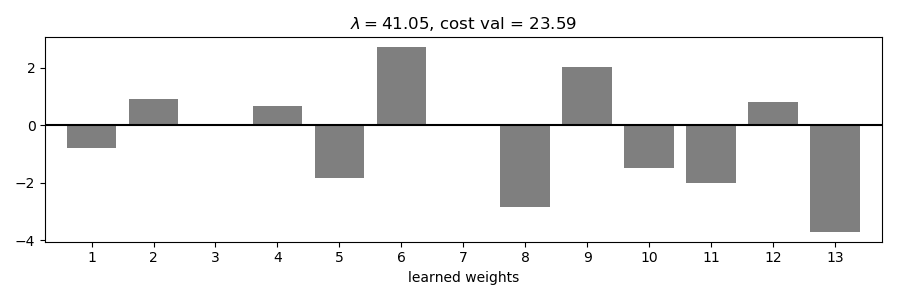
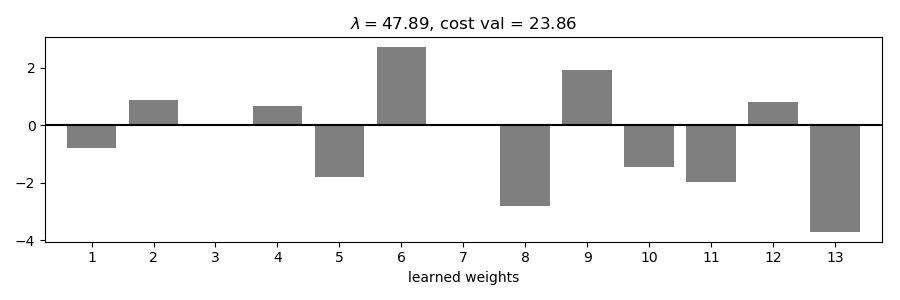
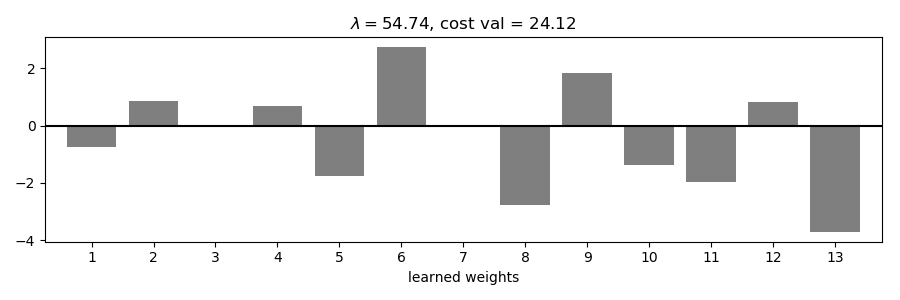
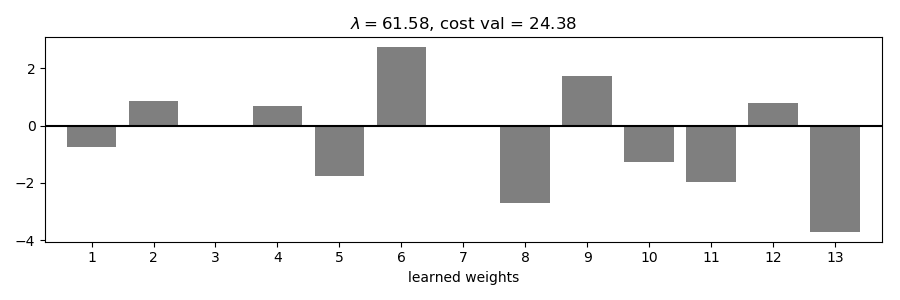
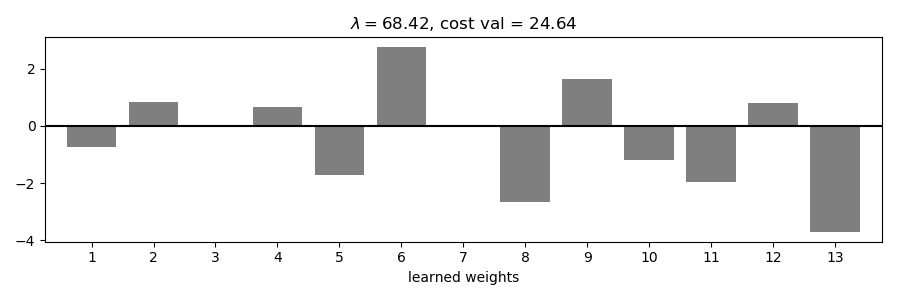
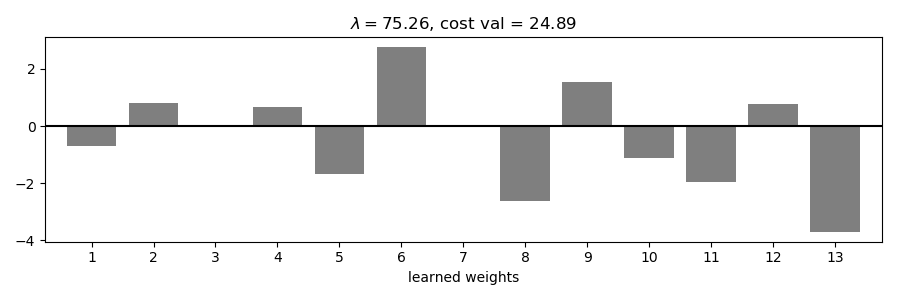
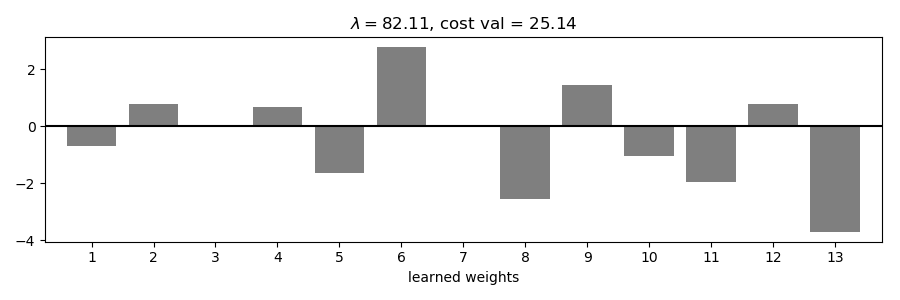
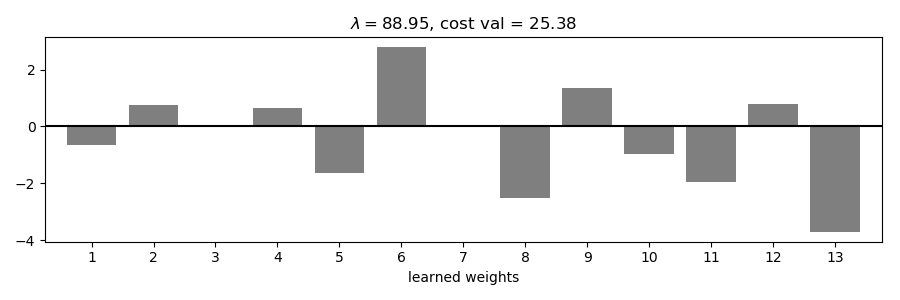
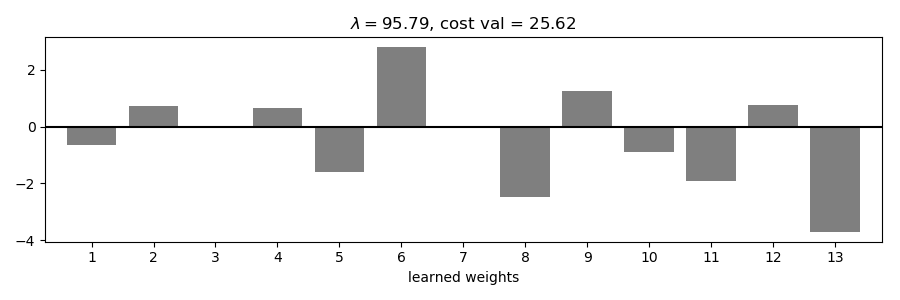
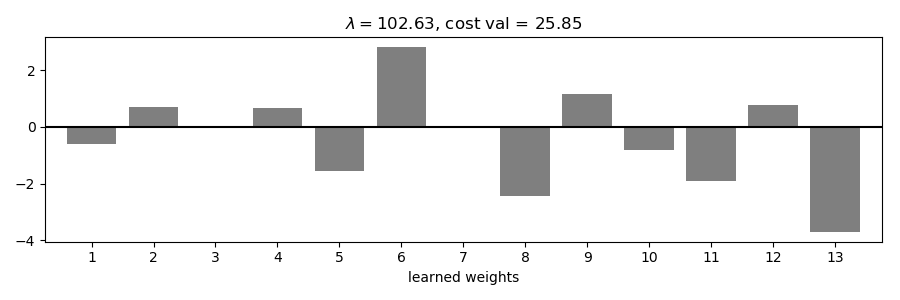
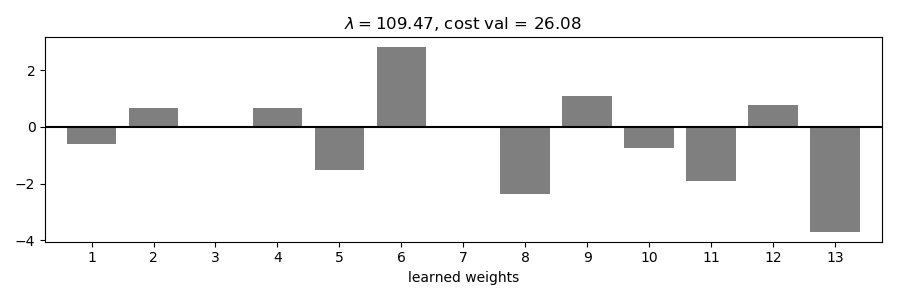
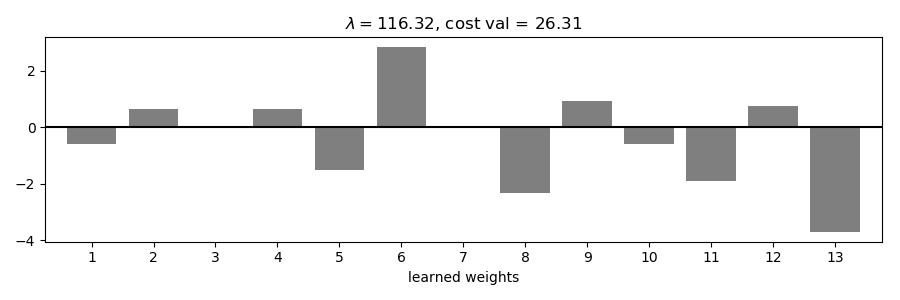
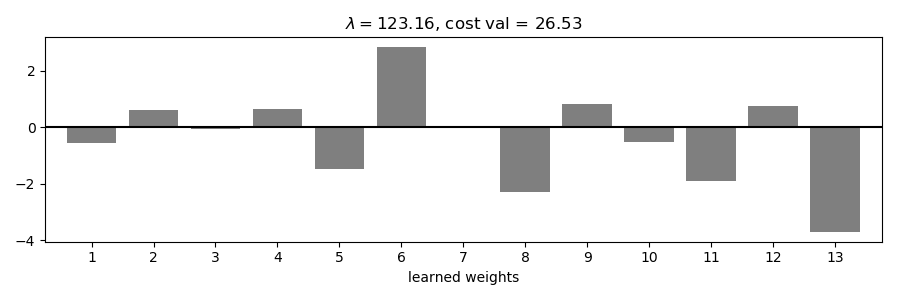
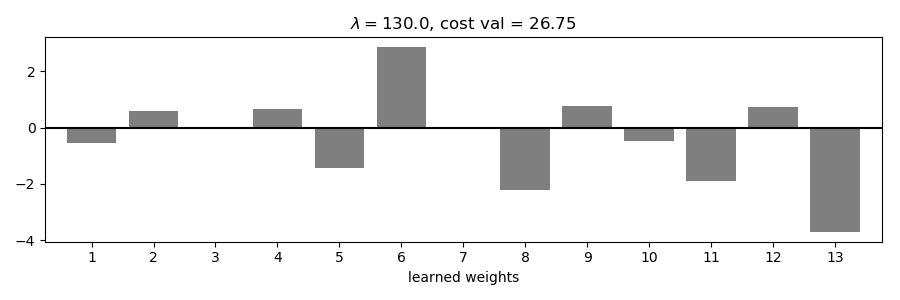

In [106]:
# plot round history
mylib.animate_lams()

Below we show the an analogous run - using the same range of values for $\lambda$ - employing the $\ell_2$ norm.  This does not sparsify the resulting weights like the $\ell_1$ norm does, and so results in optimal weights that are less human interpretable.

In [107]:
# load in data
csvname =  datapath + 'boston_housing.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import booster
mylib = superlearn.reg_lib.superlearn_setup.Setup(x,y)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(cost_name = 'least_squares',reg_name = 'L2')

# choose optimizer
mylib.choose_optimizer('gradient_descent',max_its=1000,alpha_choice=10**(-1))

# run boosting
lams = np.linspace(0,mylib.x.shape[0]*10,20)
mylib.tryout_lams(lams)


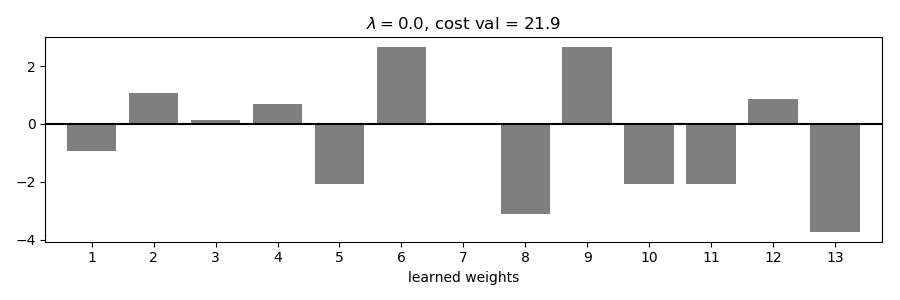
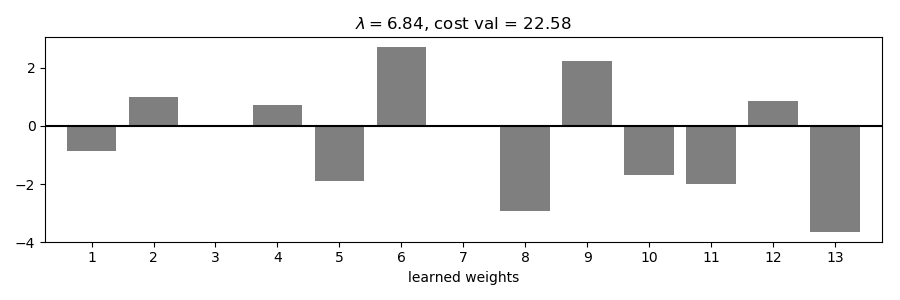
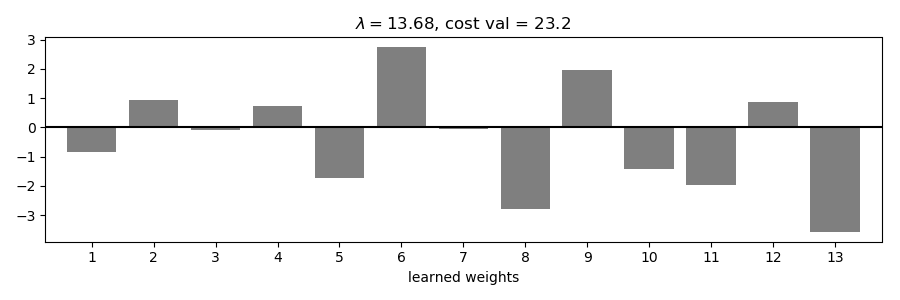
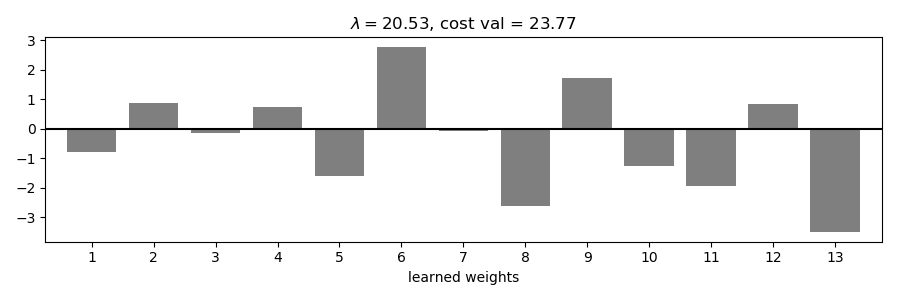
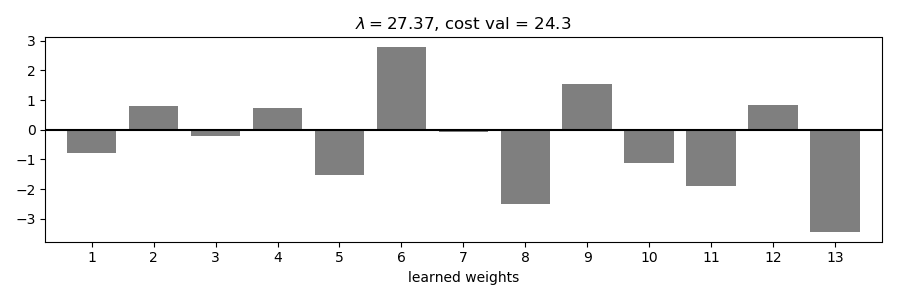
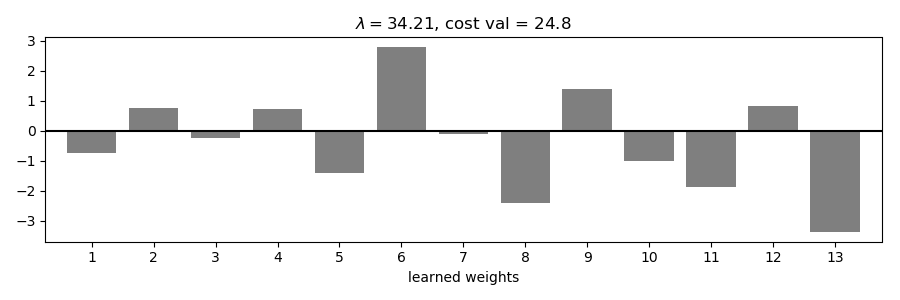
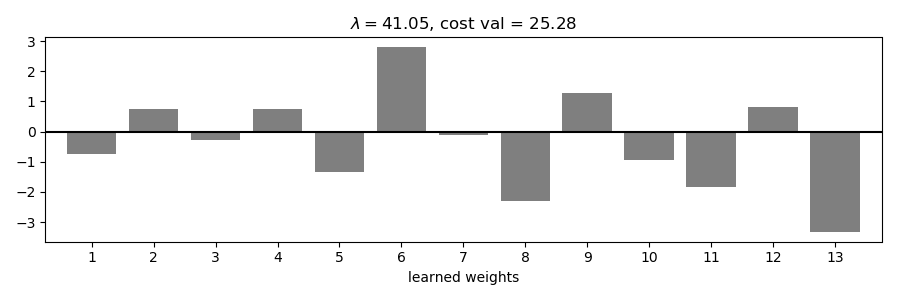
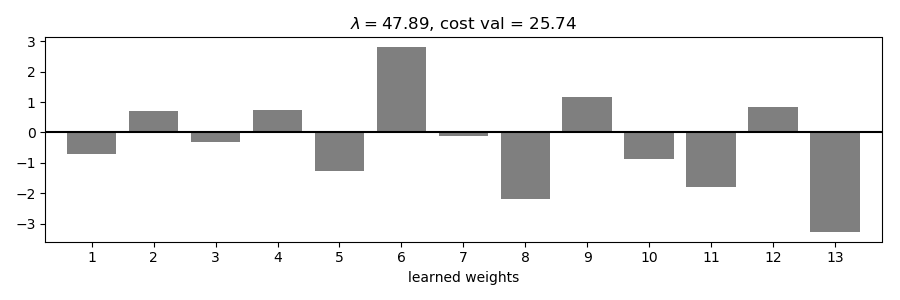
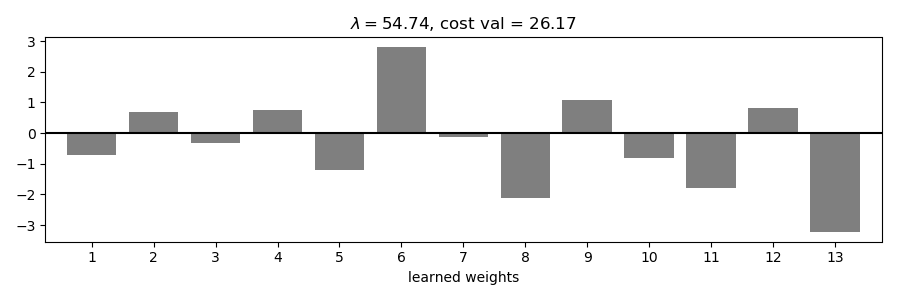
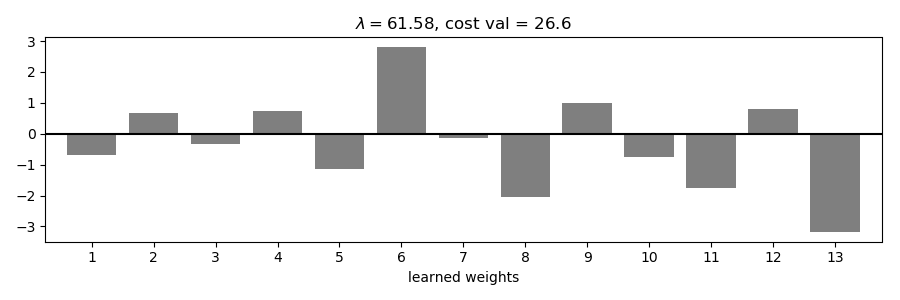
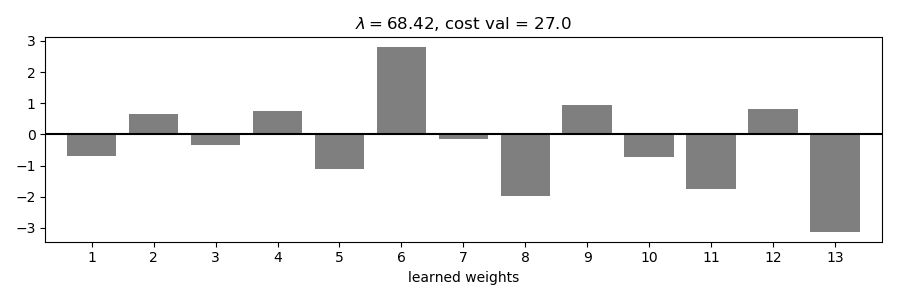
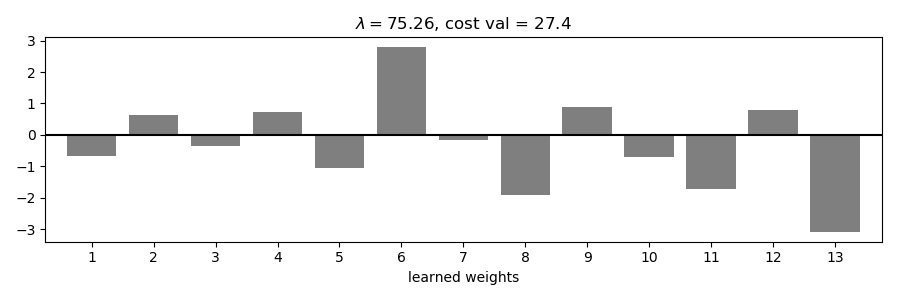
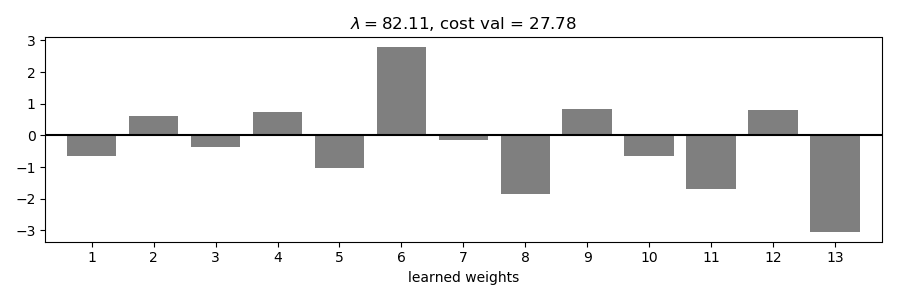
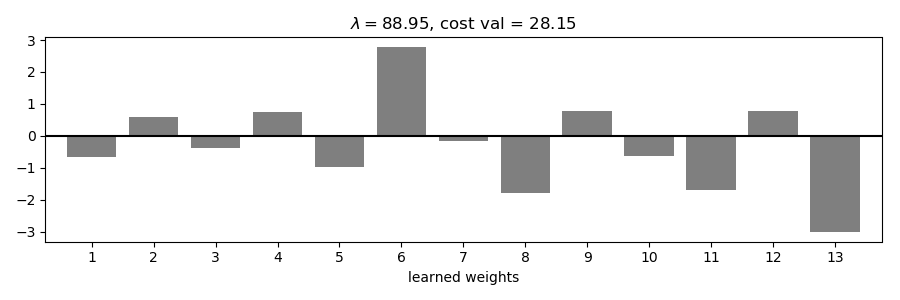
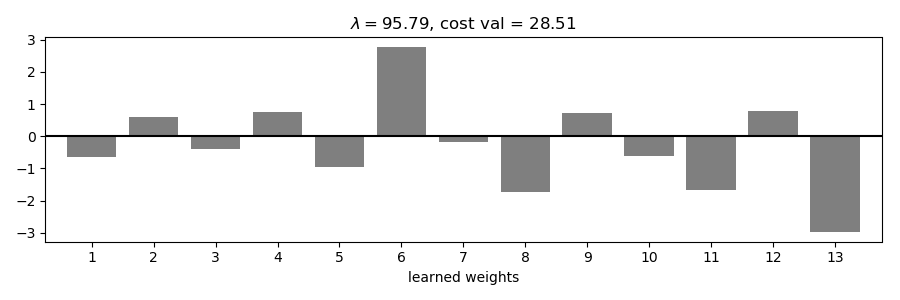
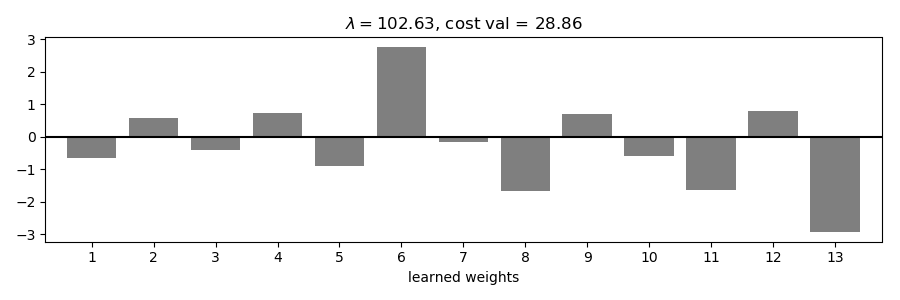
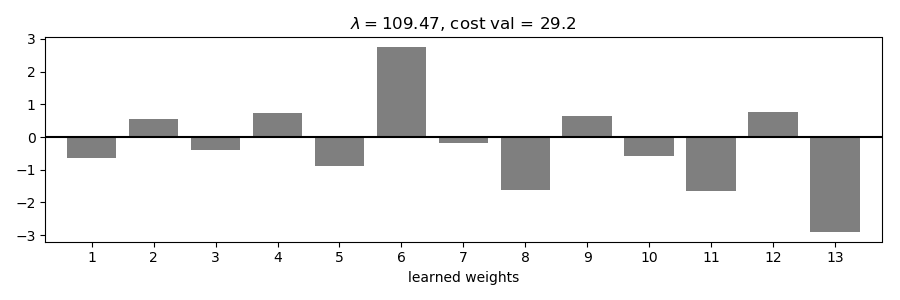
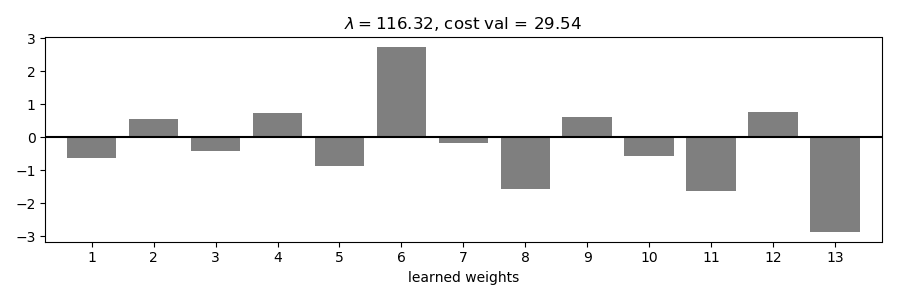
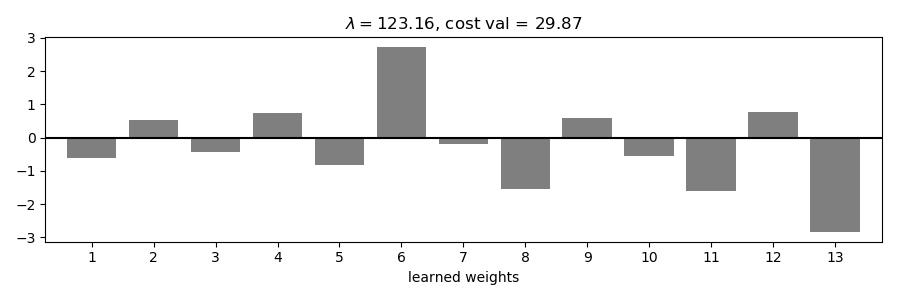
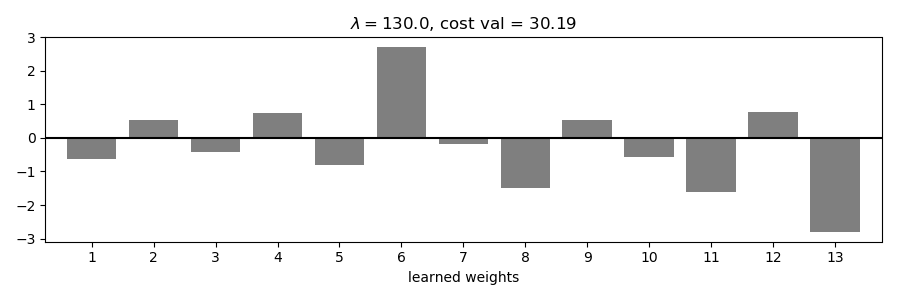

In [108]:
# plot round history
mylib.animate_lams()

# Exercise 9.13. Studying important predictors of credit risk

In this example we use the Credit Risk dataset first introduced in Example 2 of the previous Section.  This dataset consists of $P=1000$ datapoints with $N=20$ input features relating various statistics about loan applicants to their assessed credit risk.  We use $\ell_1$ regularization with $50$ evenly spaced values for $\lambda$ in the range $\left[0, 130 \right]$.  Shown in the animated figure below is a histogram of the optimal *feature-touching* weights recovered by minimizing an $\ell_1$ regularized Least Squares cost function with these various $\lambda$ values.  In each case we run $1000$ steps of gradient descent were taken with $\alpha = 10^{-1}$ for all runs. 

Moving the slider from its starting position on the left (where $\lambda = 0$) rightwards increases the value of $\lambda$ and the associated optimal set of weights are shown.  Pushing the slider all the way to the right shows the optimal weights resulting in using the maximum value for $\lambda$ used in these experiments.  As you move the slider from left to right you can see how the resulting optimal featre-touching weights begin to *sparsify*, with many of them diminishing to near zero values.  By the time $\lambda \approx 40$ five major weights remain, corresponding to feature $1 - 3$ and $6 - 7$.  The first there features were also determined to be important via boosting - and can be easily interpreted. 

In [111]:
# load in dataset
csvname = datapath + 'credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import booster
mylib = superlearn.reg_lib.superlearn_setup.Setup(x,y)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(cost_name = 'softmax',reg_name = 'L1')

# choose optimizer
mylib.choose_optimizer('gradient_descent',max_its=1000,alpha_choice=10**(-1))

# run regularization
lams = np.linspace(0,130,10)
mylib.tryout_lams(lams)


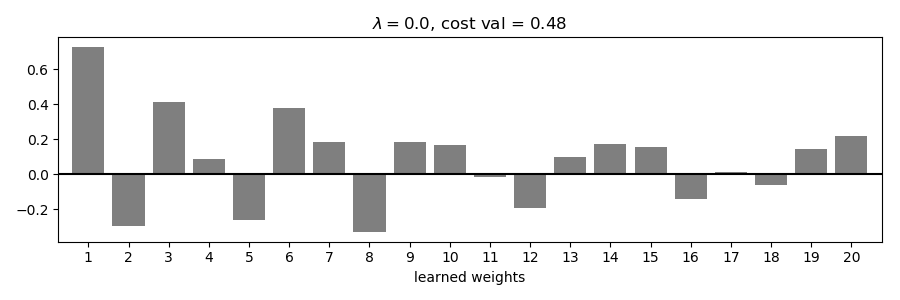
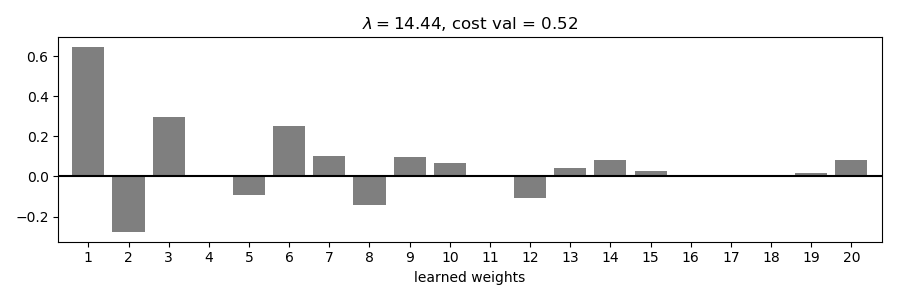
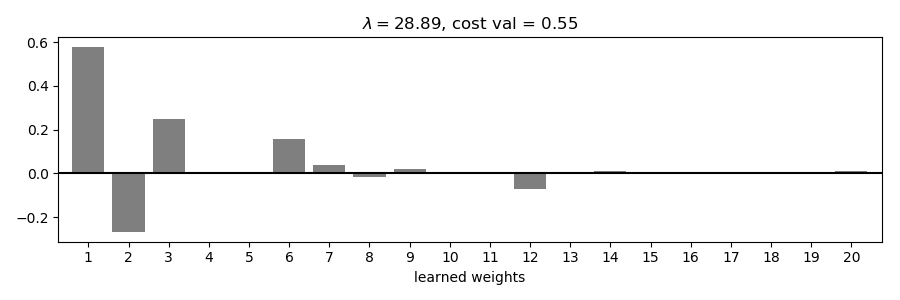
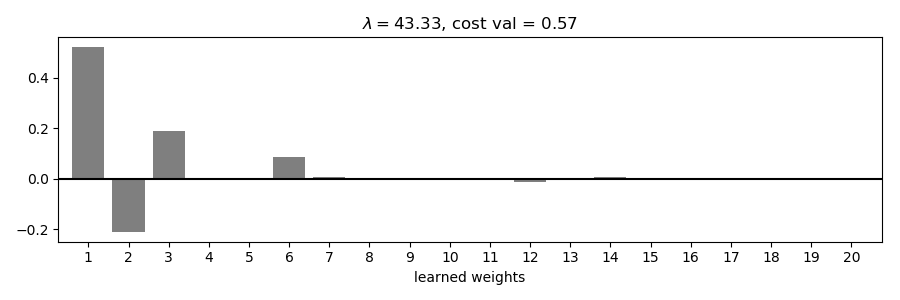
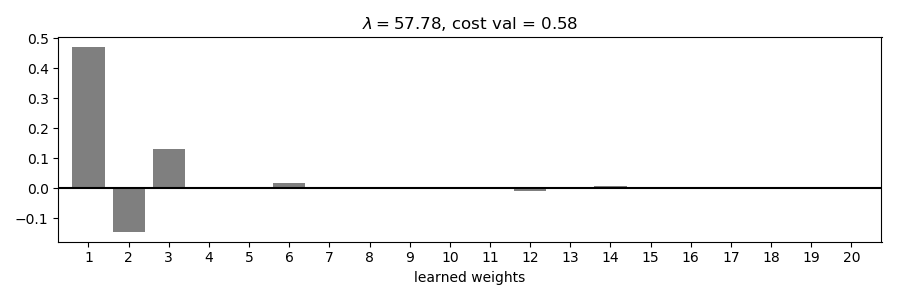
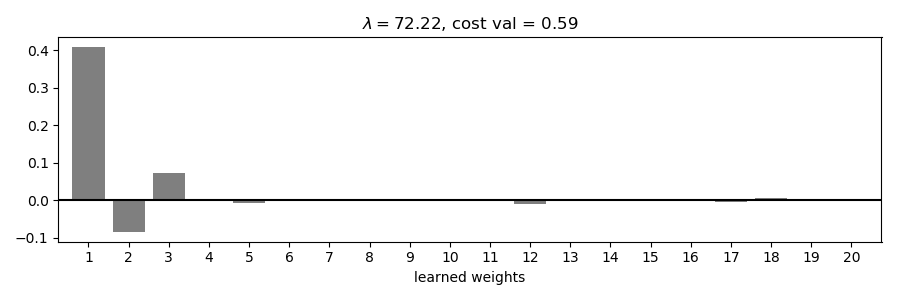
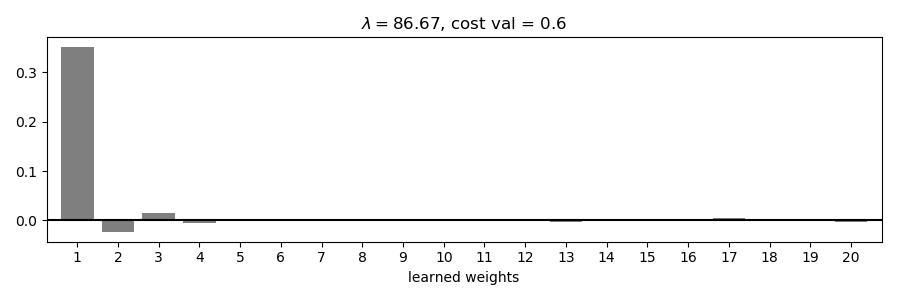
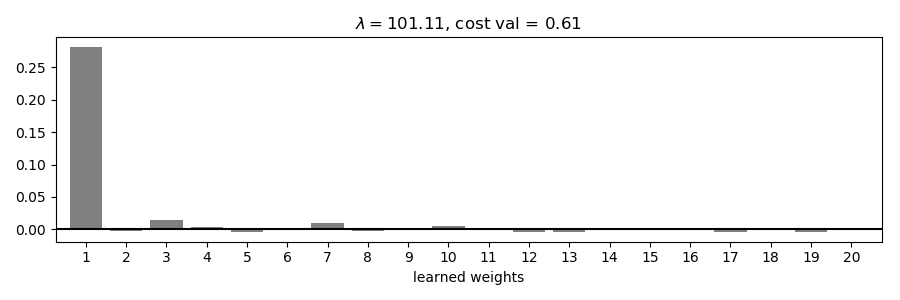
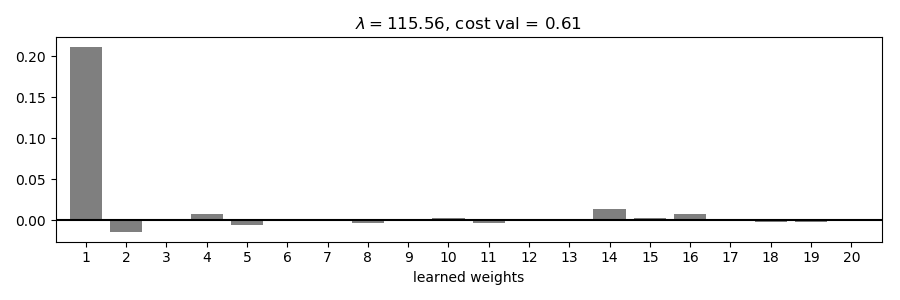
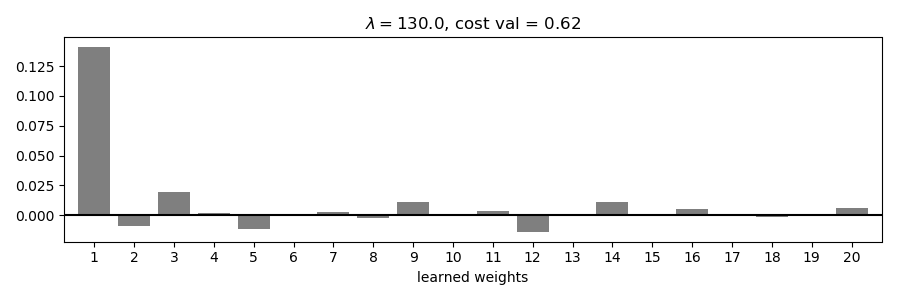

In [112]:
# plot round history
mylib.animate_lams()